In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.graphics.regressionplots as regressionplots

%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('ToyotaCorolla.csv', encoding = 'latin1')
df.head(6)

Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   
5   6     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  12950         32   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ... Central_Lock  \
0         10      2002  46986    Diesel  90          1  ...            1   
1         10      2002  72937    Diesel  90          1  ...            1   
2          9      2002  41711    Diesel  90          1  ...            0   
3          7      2002  48000    Diesel  90          0  ...            0   
4          3      2002  38500    Diesel  90          0  ...            1   
5          1      2002  61000    Diesel  90          0  ...            1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                1               1      0          0            0   
1                0               1      0          0            0   
2                0               1      0          0            0   
3                0               1      0          0            0   
4                1               1      0          1            0   
5                1               1      0          1            0   

   Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0                 1             0               0        0  
1                 1             0               0        0  
2                 1             0               0        0  
3                 1             0               0        0  
4                 1             0               0        0  
5                 1             0               0        0  

[6 rows x 38 columns]

In [8]:
df = df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
df.head()

Price  Age_08_04     KM  HP    cc  Doors  Gears  Quarterly_Tax  Weight
0  13500         23  46986  90  2000      3      5            210    1165
1  13750         23  72937  90  2000      3      5            210    1165
2  13950         24  41711  90  2000      3      5            210    1165
3  14950         26  48000  90  2000      3      5            210    1165
4  13750         30  38500  90  2000      3      5            210    1170

In [9]:
# EDA

In [10]:
df = df.rename(columns = {'Age_08_04' : 'Age', 'cc' : 'CC'})

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age            1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   CC             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [12]:
df.describe()

Price          Age             KM           HP           CC  \
count   1436.000000  1436.000000    1436.000000  1436.000000   1436.00000   
mean   10730.824513    55.947075   68533.259749   101.502089   1576.85585   
std     3626.964585    18.599988   37506.448872    14.981080    424.38677   
min     4350.000000     1.000000       1.000000    69.000000   1300.00000   
25%     8450.000000    44.000000   43000.000000    90.000000   1400.00000   
50%     9900.000000    61.000000   63389.500000   110.000000   1600.00000   
75%    11950.000000    70.000000   87020.750000   110.000000   1600.00000   
max    32500.000000    80.000000  243000.000000   192.000000  16000.00000   

             Doors        Gears  Quarterly_Tax      Weight  
count  1436.000000  1436.000000    1436.000000  1436.00000  
mean      4.033426     5.026462      87.122563  1072.45961  
std       0.952677     0.188510      41.128611    52.64112  
min       2.000000     3.000000      19.000000  1000.00000  
25%       3.000000     5.000000      69.000000  1040.00000  
50%       4.000000     5.000000      85.000000  1070.00000  
75%       5.000000     5.000000      85.000000  1085.00000  
max       5.000000     6.000000     283.000000  1615.00000

In [13]:
df.isna().sum()

Price            0
Age              0
KM               0
HP               0
CC               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [14]:
df[df.duplicated(keep = False)]

Price  Age     KM   HP    CC  Doors  Gears  Quarterly_Tax  Weight
112  24950    8  13253  116  2000      5      5            234    1320
113  24950    8  13253  116  2000      5      5            234    1320

In [15]:
df.drop_duplicates(keep = 'first', inplace = True)

In [16]:
# Check Duplicate

df[df.duplicated()]

Empty DataFrame
Columns: [Price, Age, KM, HP, CC, Doors, Gears, Quarterly_Tax, Weight]
Index: []

In [17]:
df = df.reset_index(drop = True)

In [18]:
# Check reset index

df.iloc[110:115,:]

Price  Age     KM   HP    CC  Doors  Gears  Quarterly_Tax  Weight
110  31000    4   4000  116  2000      5      5            283    1480
111  31275    4   1500  116  2000      5      5            283    1480
112  24950    8  13253  116  2000      5      5            234    1320
113  22950    7  10000  116  2000      5      5            234    1270
114  24990    8   6000   90  2000      5      5            234    1280

In [19]:
df.corr()

Price       Age        KM        HP        CC     Doors  \
Price          1.000000 -0.876273 -0.569420  0.314134  0.124375  0.183604   
Age           -0.876273  1.000000  0.504575 -0.155293 -0.096549 -0.146929   
KM            -0.569420  0.504575  1.000000 -0.332904  0.103822 -0.035193   
HP             0.314134 -0.155293 -0.332904  1.000000  0.035207  0.091803   
CC             0.124375 -0.096549  0.103822  0.035207  1.000000  0.079254   
Doors          0.183604 -0.146929 -0.035193  0.091803  0.079254  1.000000   
Gears          0.063831 -0.005629  0.014890  0.209642  0.014732 -0.160101   
Quarterly_Tax  0.211508 -0.193319  0.283312 -0.302287  0.305982  0.107353   
Weight         0.575869 -0.466484 -0.023969  0.087143  0.335077  0.301734   

                  Gears  Quarterly_Tax    Weight  
Price          0.063831       0.211508  0.575869  
Age           -0.005629      -0.193319 -0.466484  
KM             0.014890       0.283312 -0.023969  
HP             0.209642      -0.302287  0.087143  
CC             0.014732       0.305982  0.335077  
Doors         -0.160101       0.107353  0.301734  
Gears          1.000000      -0.005125  0.021238  
Quarterly_Tax -0.005125       1.000000  0.621988  
Weight         0.021238       0.621988  1.000000

<AxesSubplot:>

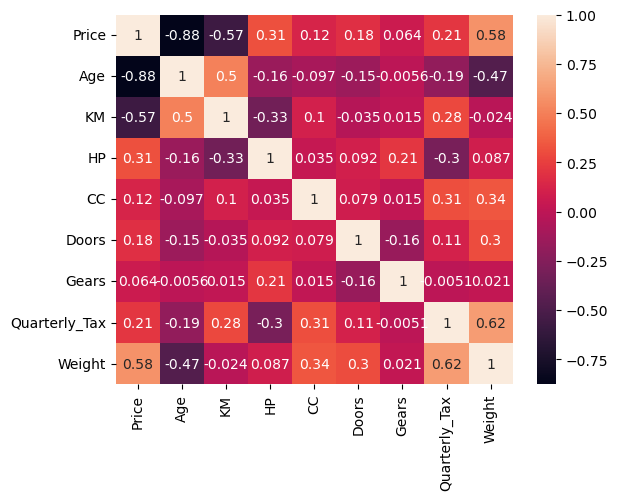

In [20]:
sns.heatmap(df.corr(), annot=True)

In [22]:
plt.rcParams['figure.dpi'] = 250

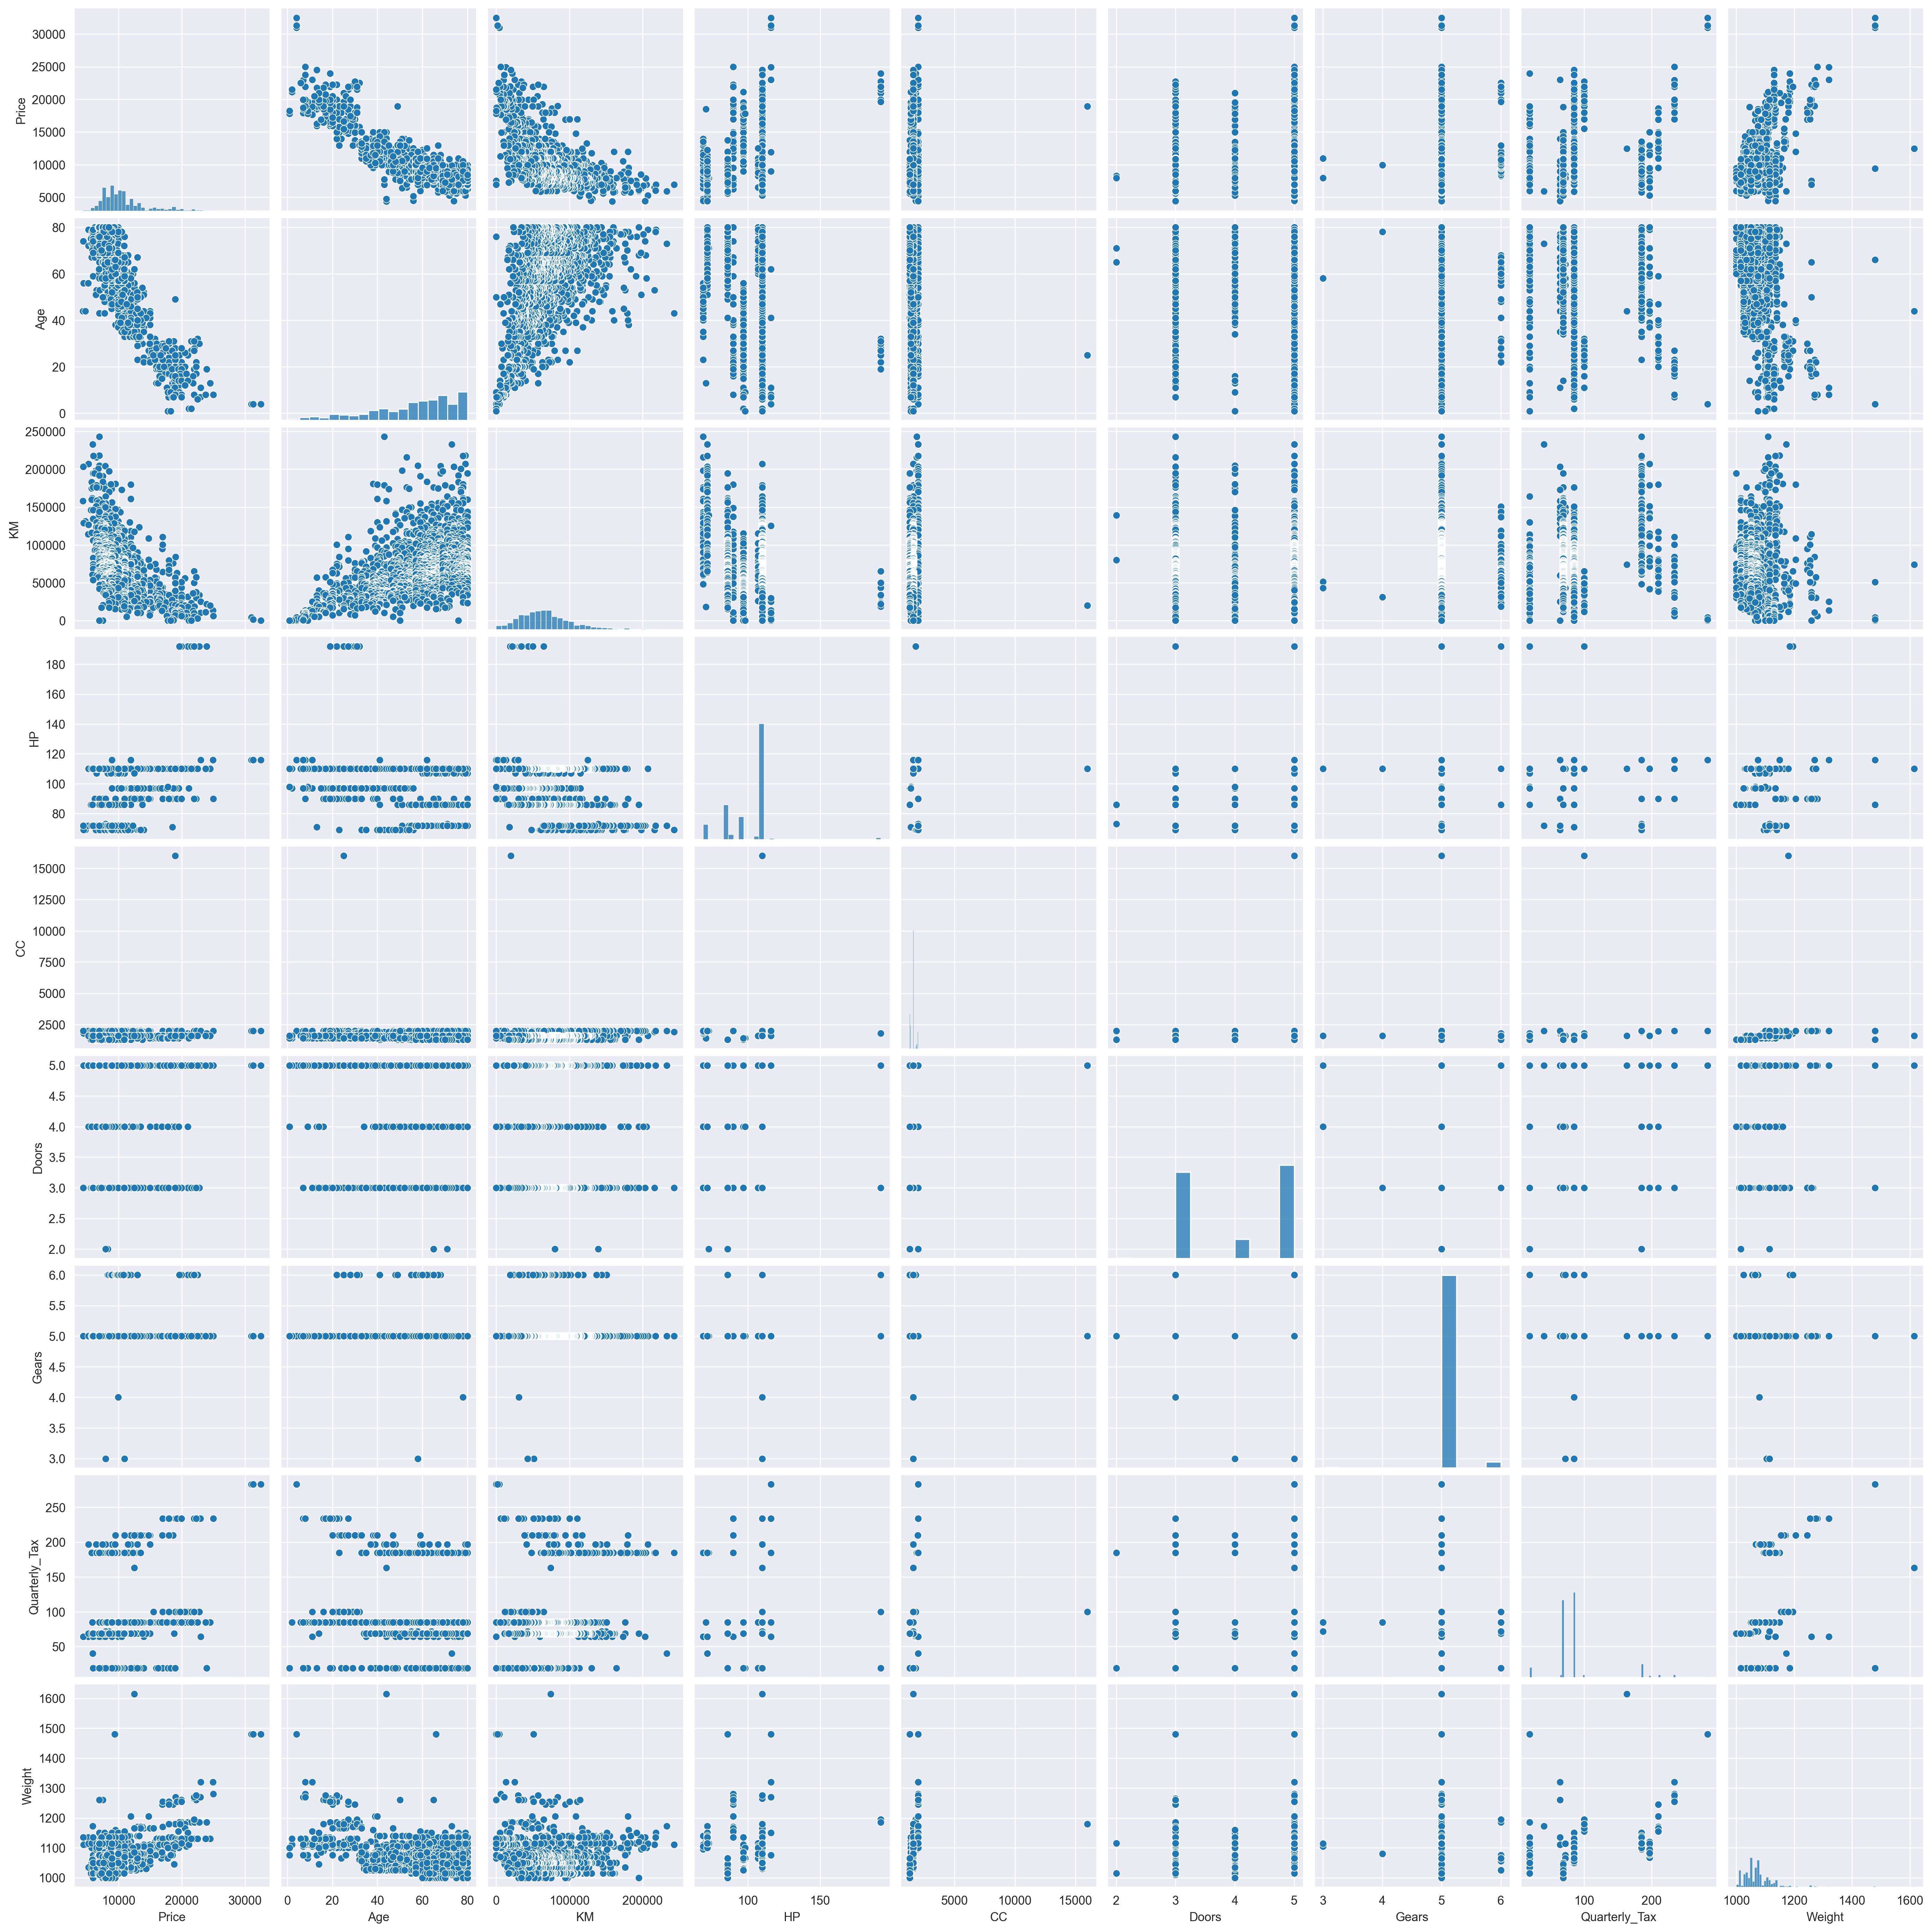

In [23]:
sns.set_style(style ='darkgrid')
sns.pairplot(df)

**Model Building**

- Dependent variable = Price.
- Independent Variable = Age, KM, HP, CC, Doors, Gears, Quarterly_Tax, Weight.

In [24]:
model = smf.ols('Price ~ Age+KM+HP+CC+Doors+Gears+Quarterly_Tax+Weight', data = df).fit()

In [25]:
# Check values of intercept and slope

model.params

Intercept       -5472.540368
Age              -121.713891
KM                 -0.020737
HP                 31.584612
CC                 -0.118558
Doors              -0.920189
Gears             597.715894
Quarterly_Tax       3.858805
Weight             16.855470
dtype: float64

In [26]:
# Checking t-values and p-values

In [27]:
print('t-values:- ', '\n', round(model.tvalues, 5))
print('p-values:- ', '\n', round(model.pvalues, 5))

t-values:-  
 Intercept        -3.87527
Age             -46.55188
KM              -16.55242
HP               11.20972
CC               -1.31644
Doors            -0.02301
Gears             3.03456
Quarterly_Tax     2.94420
Weight           15.76066
dtype: float64
p-values:-  
 Intercept        0.00011
Age              0.00000
KM               0.00000
HP               0.00000
CC               0.18824
Doors            0.98164
Gears            0.00245
Quarterly_Tax    0.00329
Weight           0.00000
dtype: float64


In [28]:
# Check rsquared values

In [29]:
print('rsquared = ', round(model.rsquared, 4))
print('rsquared_adj = ', round(model.rsquared_adj, 4))

rsquared =  0.8625
rsquared_adj =  0.8617


- p-values for column CC and Doors are more than alpha(0.05).

In [30]:
# Build SLR and MLR model for column CC and Doors, and check p-values.

In [31]:
# SLR model for CC.

slr_model_CC = smf.ols('Price ~ CC', data = df).fit()

In [32]:
# t-values & p-values.

In [33]:
print('t-values:- ', '\n', slr_model_CC.tvalues)
print('p-values:- ', '\n', slr_model_CC.pvalues)

t-values:-  
 Intercept    24.879592
CC            4.745039
dtype: float64
p-values:-  
 Intercept    7.236022e-114
CC            2.292856e-06
dtype: float64


In [34]:
#SLR model for Doors

slr_model_doors = smf.ols('Price ~ Doors', data = df).fit()

In [35]:
# t-values & p-values

In [36]:
print('t-values:- ', '\n', slr_model_doors.tvalues)
print('p-values:- ', '\n', slr_model_doors.pvalues)

t-values:-  
 Intercept    19.421546
Doors         7.070520
dtype: float64
p-values:-  
 Intercept    8.976407e-75
Doors        2.404166e-12
dtype: float64


In [37]:
#MLR model for both CC & Doors.

mlr_model = smf.ols('Price ~ CC+Doors', data = df).fit()

In [38]:
# t-values & p-values.

In [39]:
print('t-values:- ', '\n', mlr_model.tvalues)
print('p-values:- ', '\n', mlr_model.pvalues)

t-values:-  
 Intercept    12.786341
CC            4.268006
Doors         6.752236
dtype: float64
p-values:-  
 Intercept    1.580945e-35
CC           2.101878e-05
Doors        2.109558e-11
dtype: float64


# Model Validation

# Collinearity Check

- Check collinearity of all independent variables.
- VIF = 1/(1-rsquared)

In [41]:
# VIF for age
rsq_Age = smf.ols('Age ~ KM+HP+CC+Doors+Gears+Quarterly_Tax+Weight', data = df).fit().rsquared
vif_Age = 1/(1-rsq_Age)

# VIF for KM
rsq_KM = smf.ols('KM ~ Age+HP+CC+Doors+Gears+Quarterly_Tax+Weight', data = df).fit().rsquared
vif_KM = 1/(1-rsq_KM)

# VIF for HP
rsq_HP = smf.ols('HP ~ KM+Age+CC+Doors+Gears+Quarterly_Tax+Weight', data = df).fit().rsquared
vif_HP = 1/(1-rsq_HP)

# VIF for CC
rsq_CC = smf.ols('CC ~ KM+HP+Age+Doors+Gears+Quarterly_Tax+Weight', data = df).fit().rsquared
vif_CC = 1/(1-rsq_CC)

# VIF for Doors
rsq_Doors = smf.ols('Doors ~ KM+HP+CC+Age+Gears+Quarterly_Tax+Weight', data = df).fit().rsquared
vif_Doors = 1/(1-rsq_Doors)

# VIF for Gears
rsq_Gears = smf.ols('Gears ~ KM+HP+CC+Doors+Age+Quarterly_Tax+Weight', data = df).fit().rsquared
vif_Gears = 1/(1-rsq_Gears)

# VIF for Quarterly_Tax
rsq_QT = smf.ols('Quarterly_Tax ~ KM+HP+CC+Doors+Gears+Age+Weight', data = df).fit().rsquared
vif_QT = 1/(1-rsq_QT)

# VIF for Weight.
rsq_Weight = smf.ols('Weight ~ KM+HP+CC+Doors+Gears+Quarterly_Tax+Age', data = df).fit().rsquared
vif_Weight = 1/(1-rsq_Weight)

In [42]:
# Take values in tabuler format.

VIF_Values = pd.DataFrame()
VIF_Values['Variables'] = ['Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'QT','Weight']
VIF_Values['VIF_Values'] = [vif_Age,vif_KM,vif_HP,vif_CC,vif_Doors,vif_Gears,vif_QT,vif_Weight]
VIF_Values

Variables  VIF_Values
0       Age    1.876236
1        KM    1.757178
2        HP    1.419180
3        CC    1.163470
4     Doors    1.155890
5     Gears    1.098843
6        QT    2.295375
7    Weight    2.487180

- Here VIF values are less, so there is no colliearity between independent variables.
- we can consider all variables to build model.

# 2) Residual Analysis
 
**1) Test for Normality of Residuals (Q-Q Plot)**

In [44]:
import statsmodels.api as sm

Text(0.5, 1.0, 'Normal Q-Q plot of Residuals')

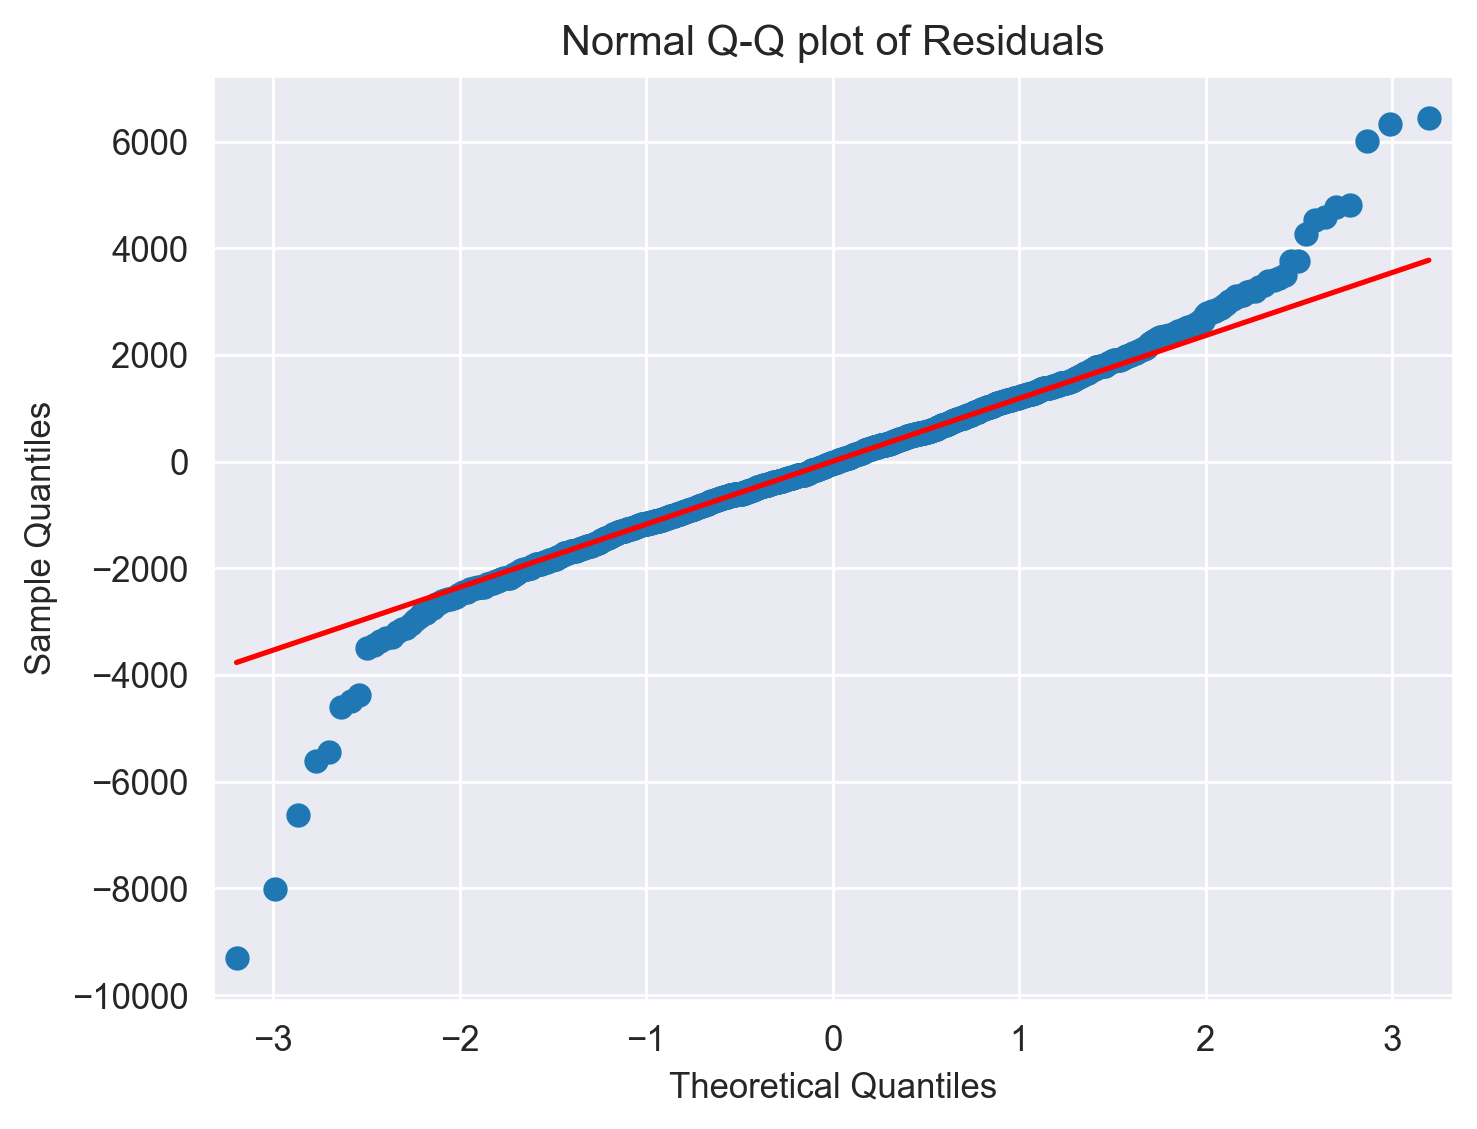

In [45]:
qqplot = sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of Residuals')

In [46]:
list[np.where(model.resid > 6000)]

list[array([109, 146, 522], dtype=int64)]

In [47]:
list[np.where(model.resid < -6000)]

list[array([220, 600, 959], dtype=int64)]

**2) Residual Plot for Homoscedasticity or Hetroscedasticity.**

In [48]:
def get_standardized_values(vals) :
    return(vals - vals.mean())/vals.std()

Text(0, 0.5, 'Standardized residual values')

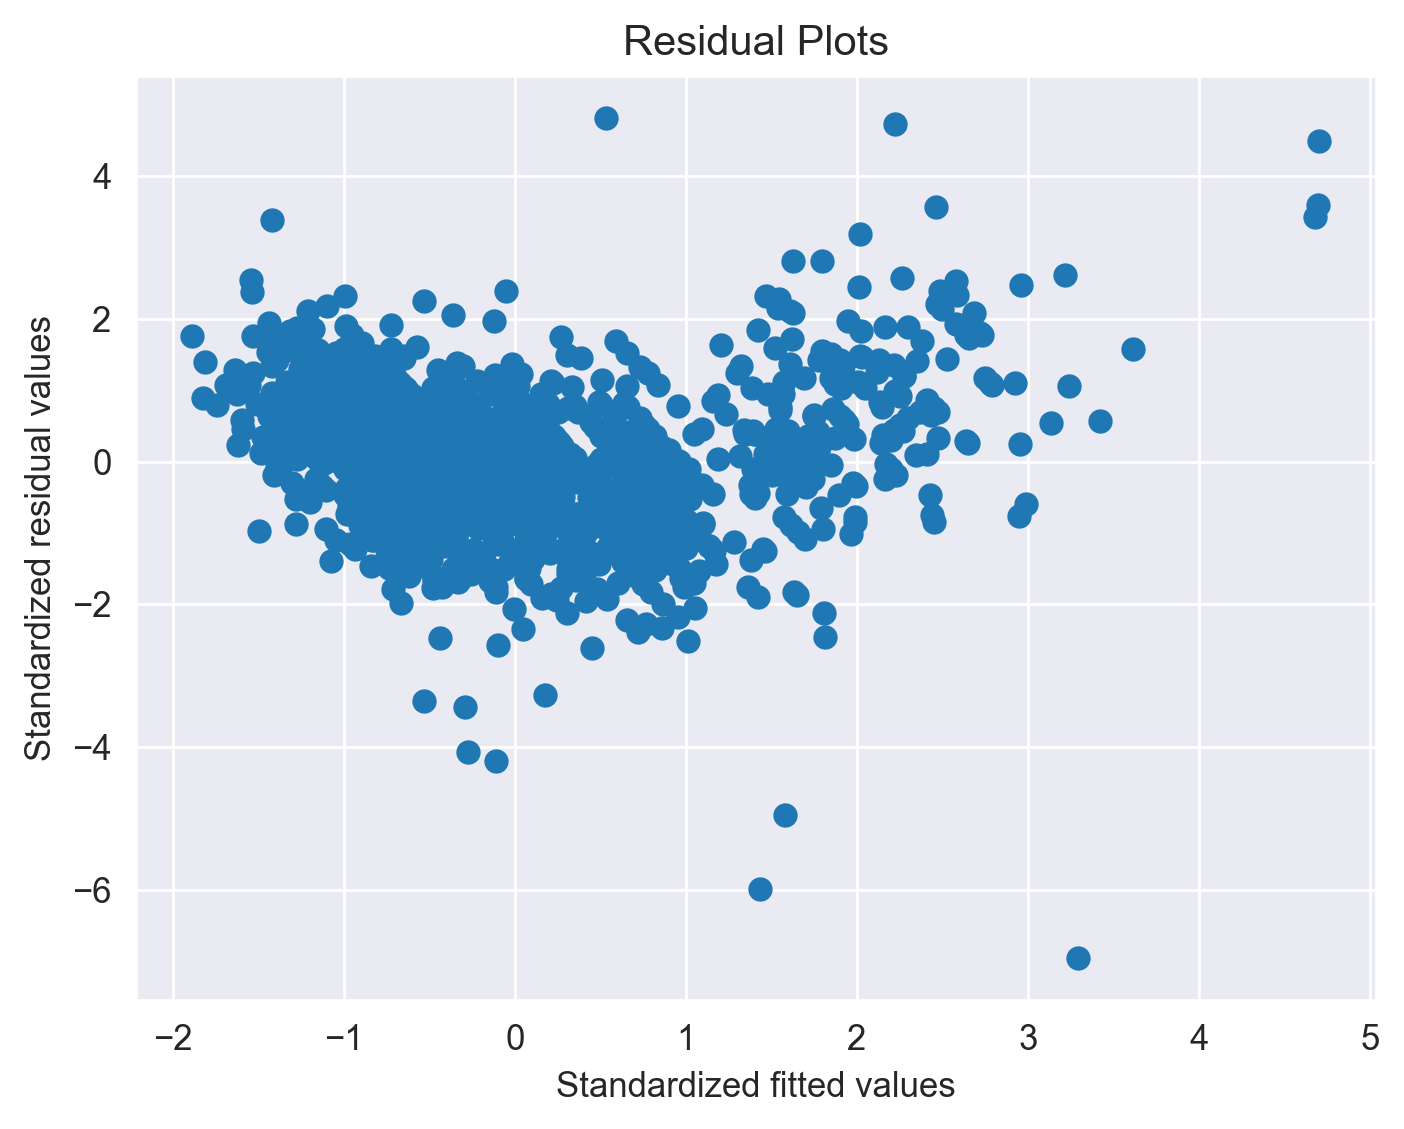

In [49]:
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))
plt.title('Residual Plots')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual values')

- By looking above graph we can say that this model follows Homoscedasticity

**3) Residual vs Regressors**

eval_env: 1


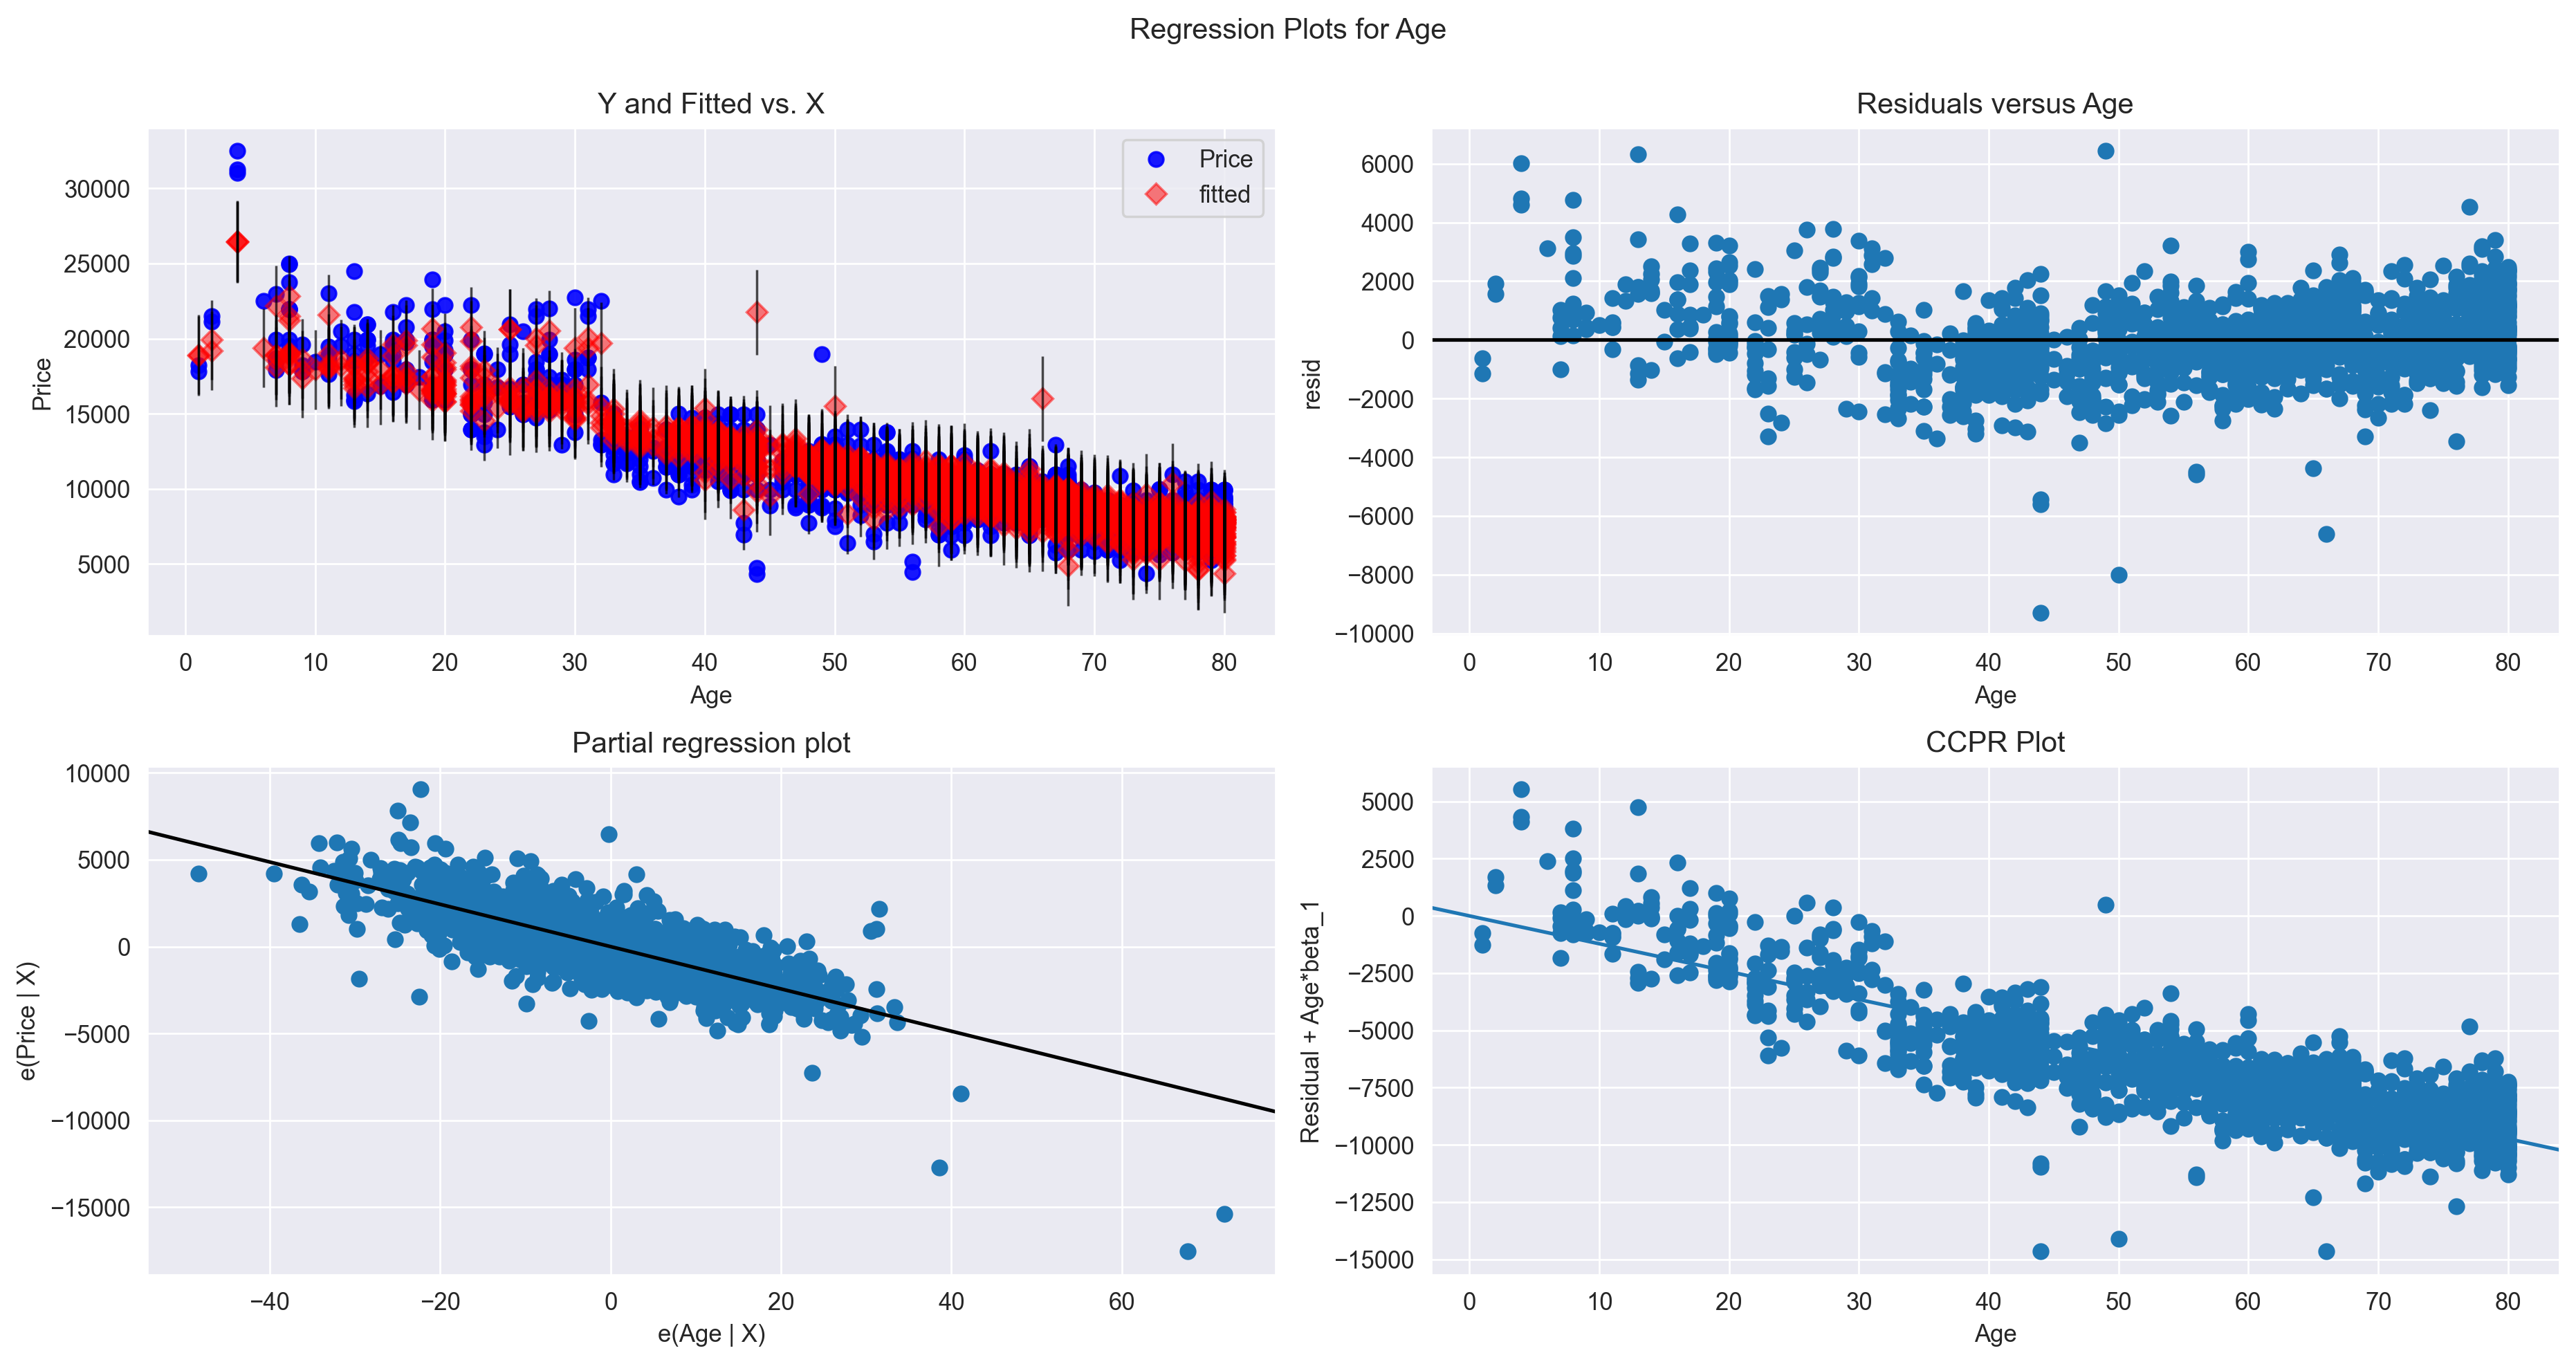

In [50]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, 'Age', fig = fig)

eval_env: 1


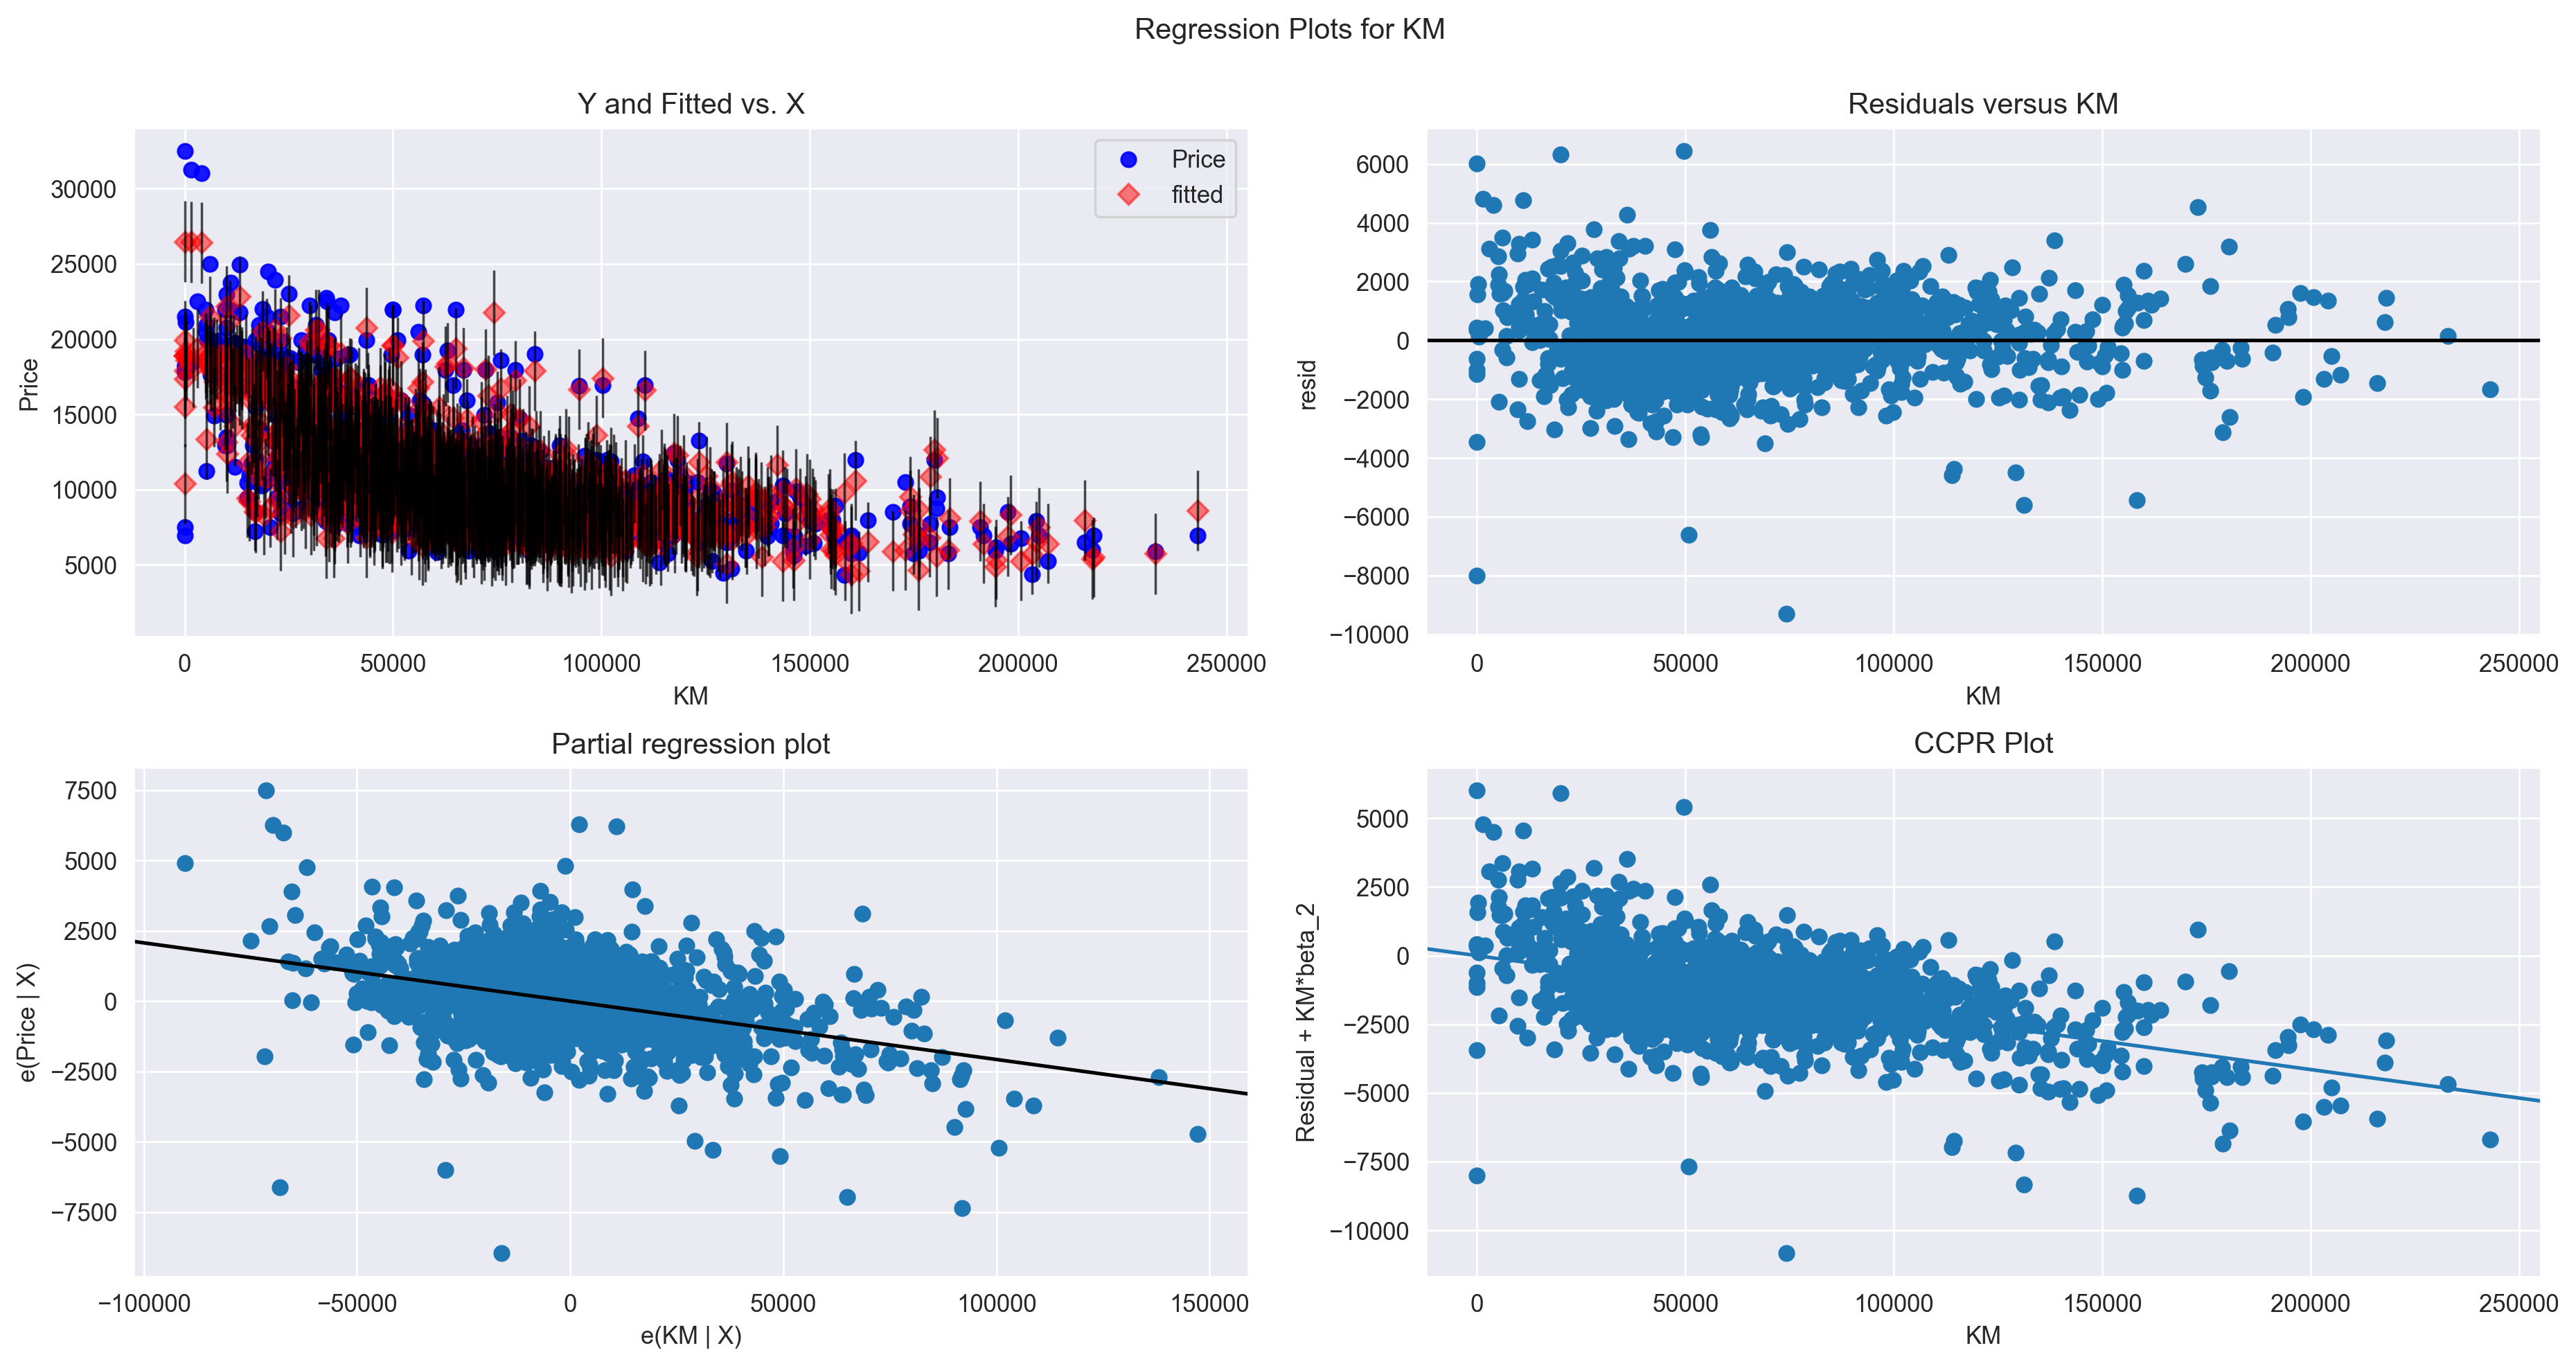

In [51]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, 'KM', fig = fig)

eval_env: 1


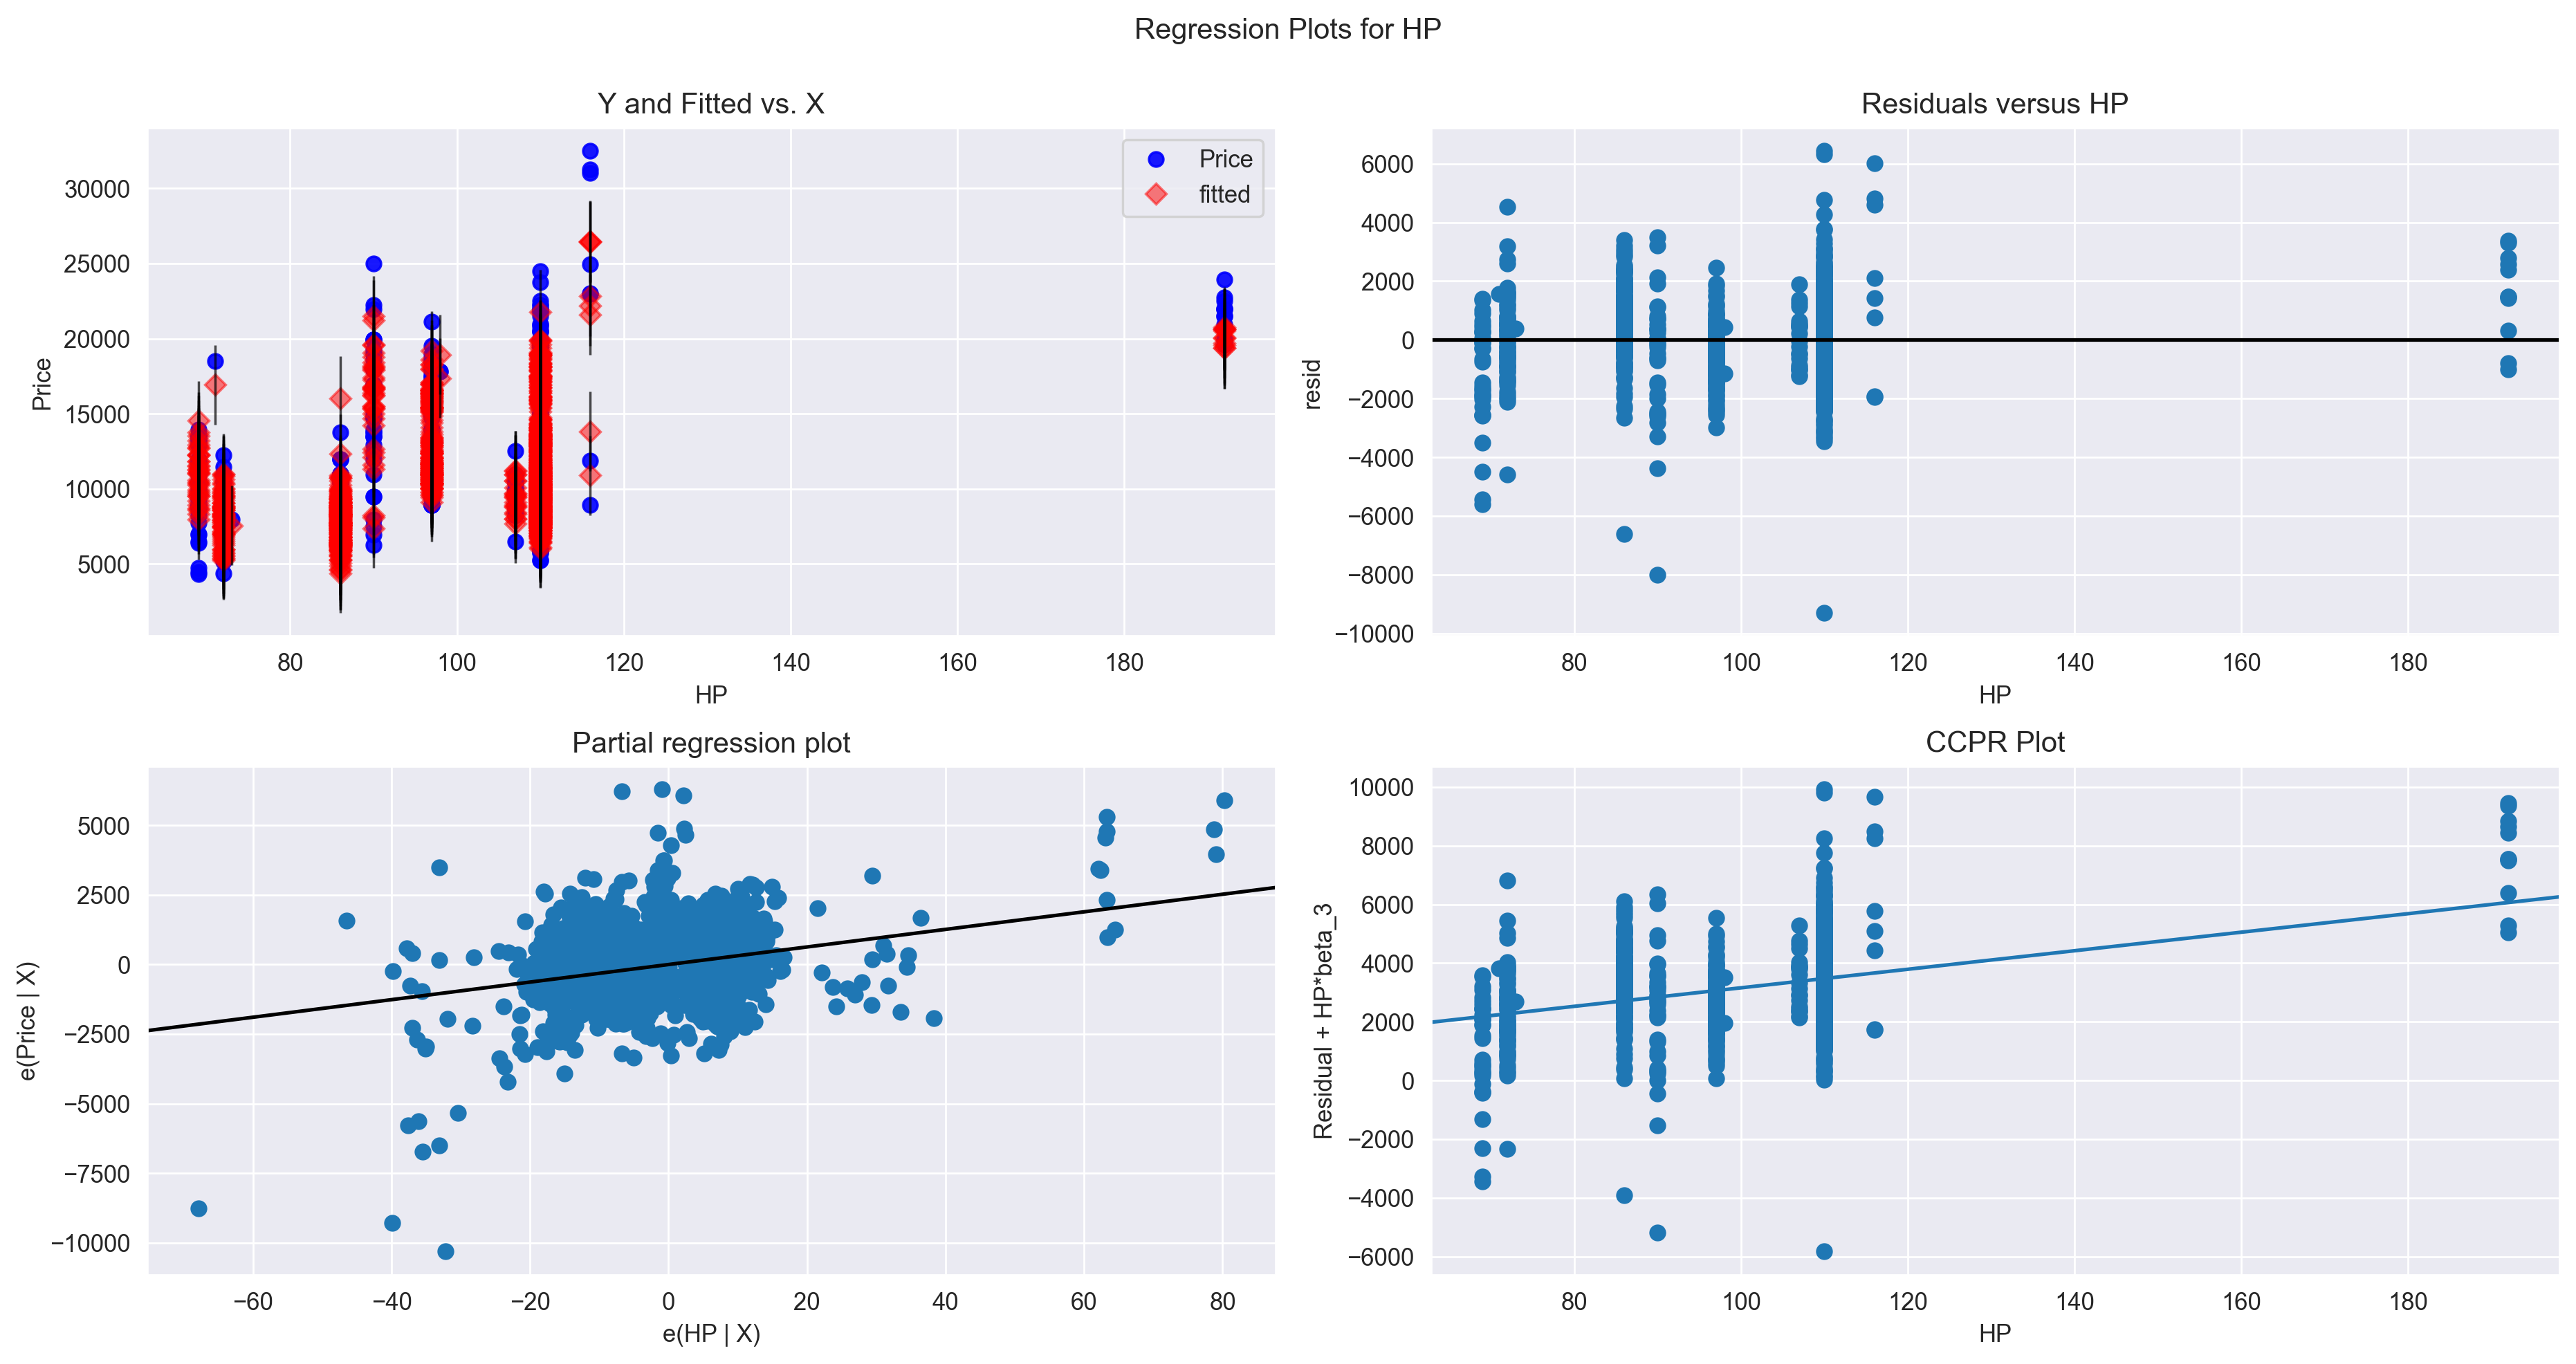

In [52]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, 'HP', fig = fig)

eval_env: 1


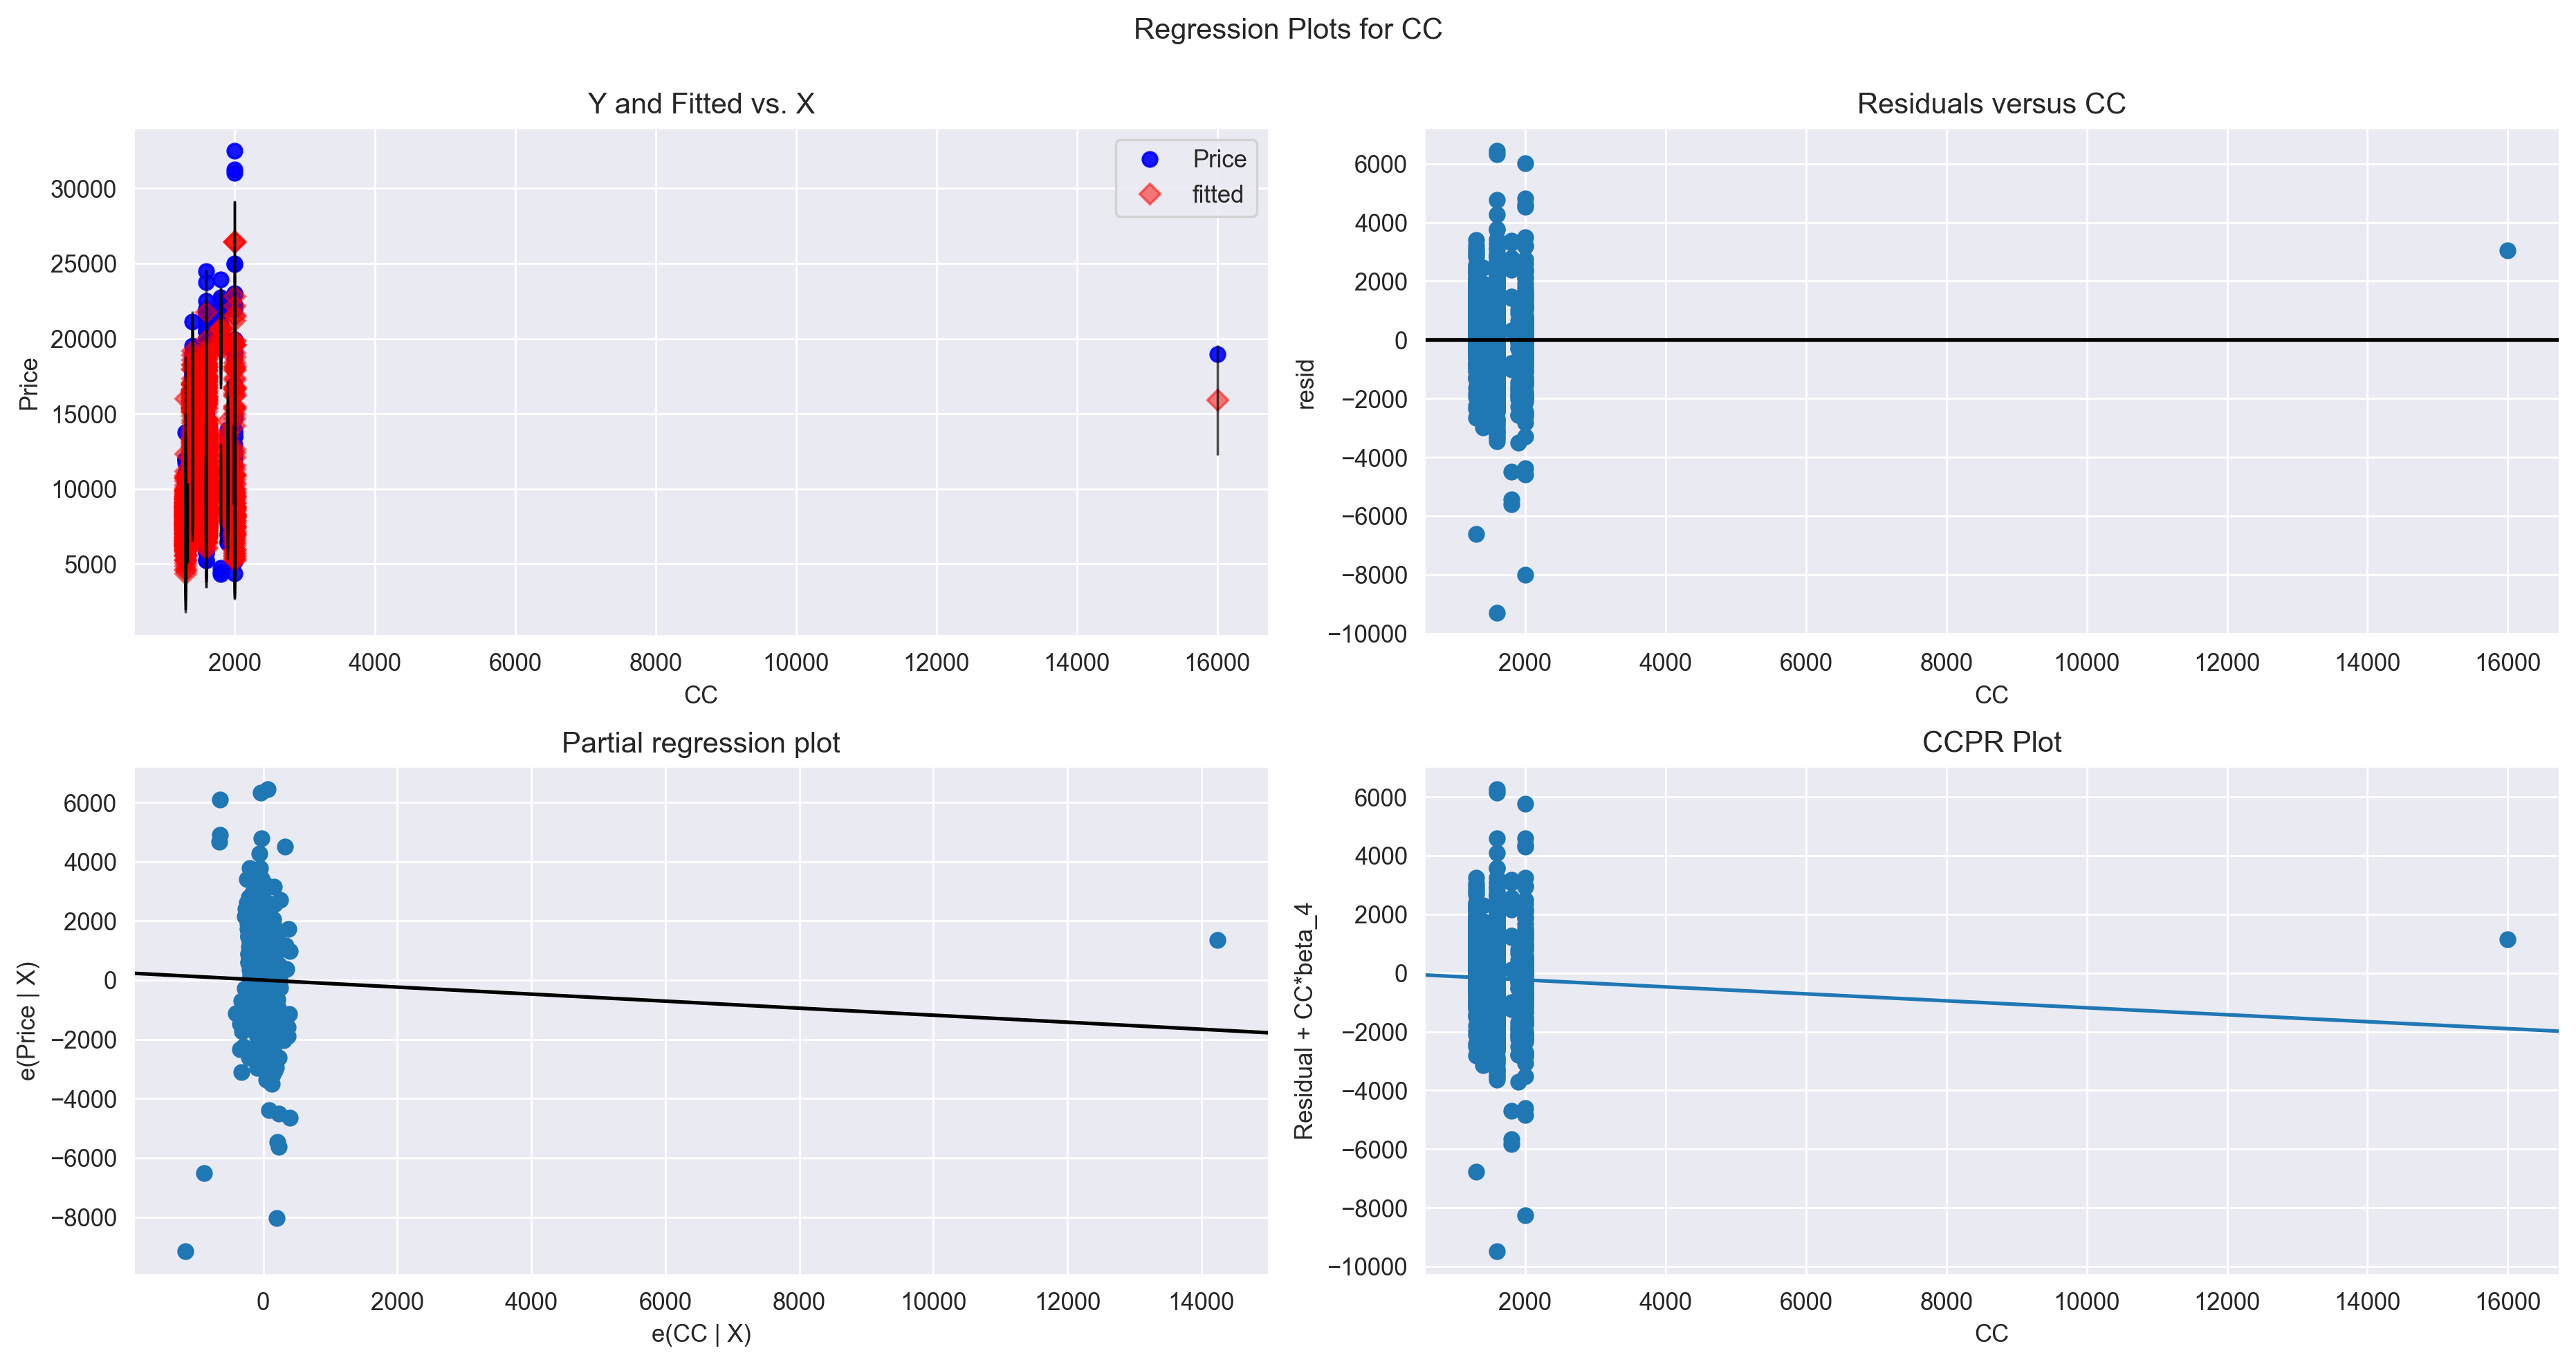

In [53]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, 'CC', fig = fig)

eval_env: 1


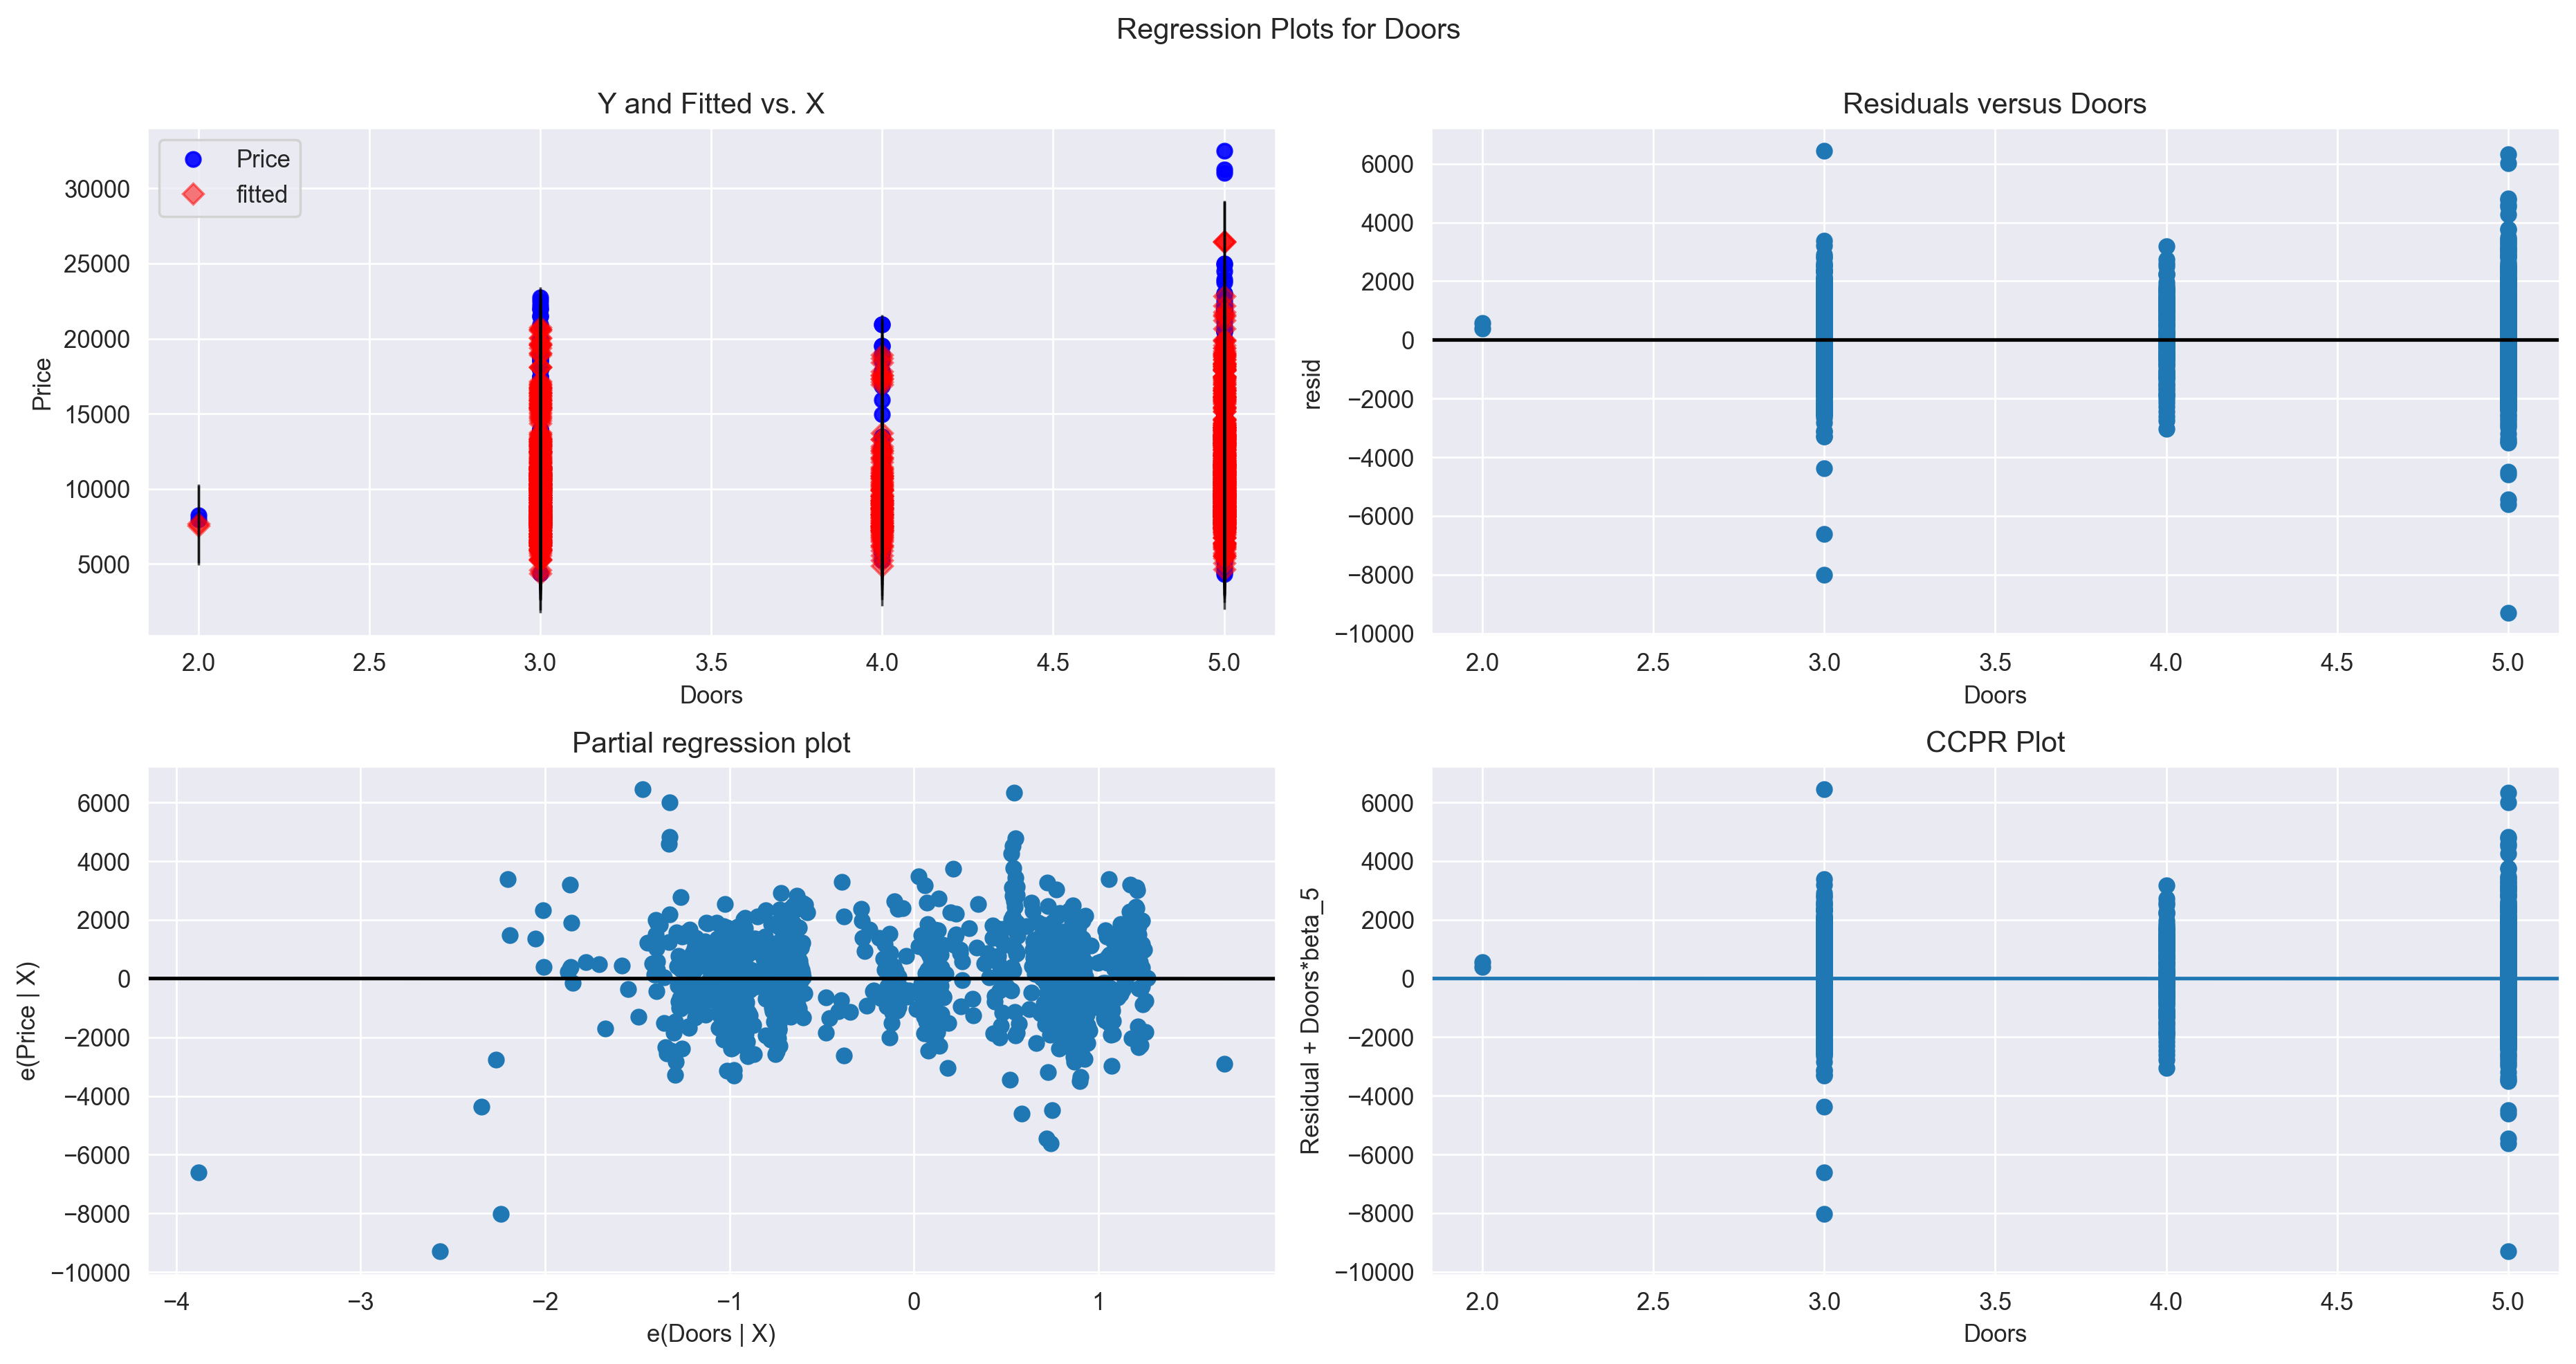

In [54]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, 'Doors', fig = fig)

eval_env: 1


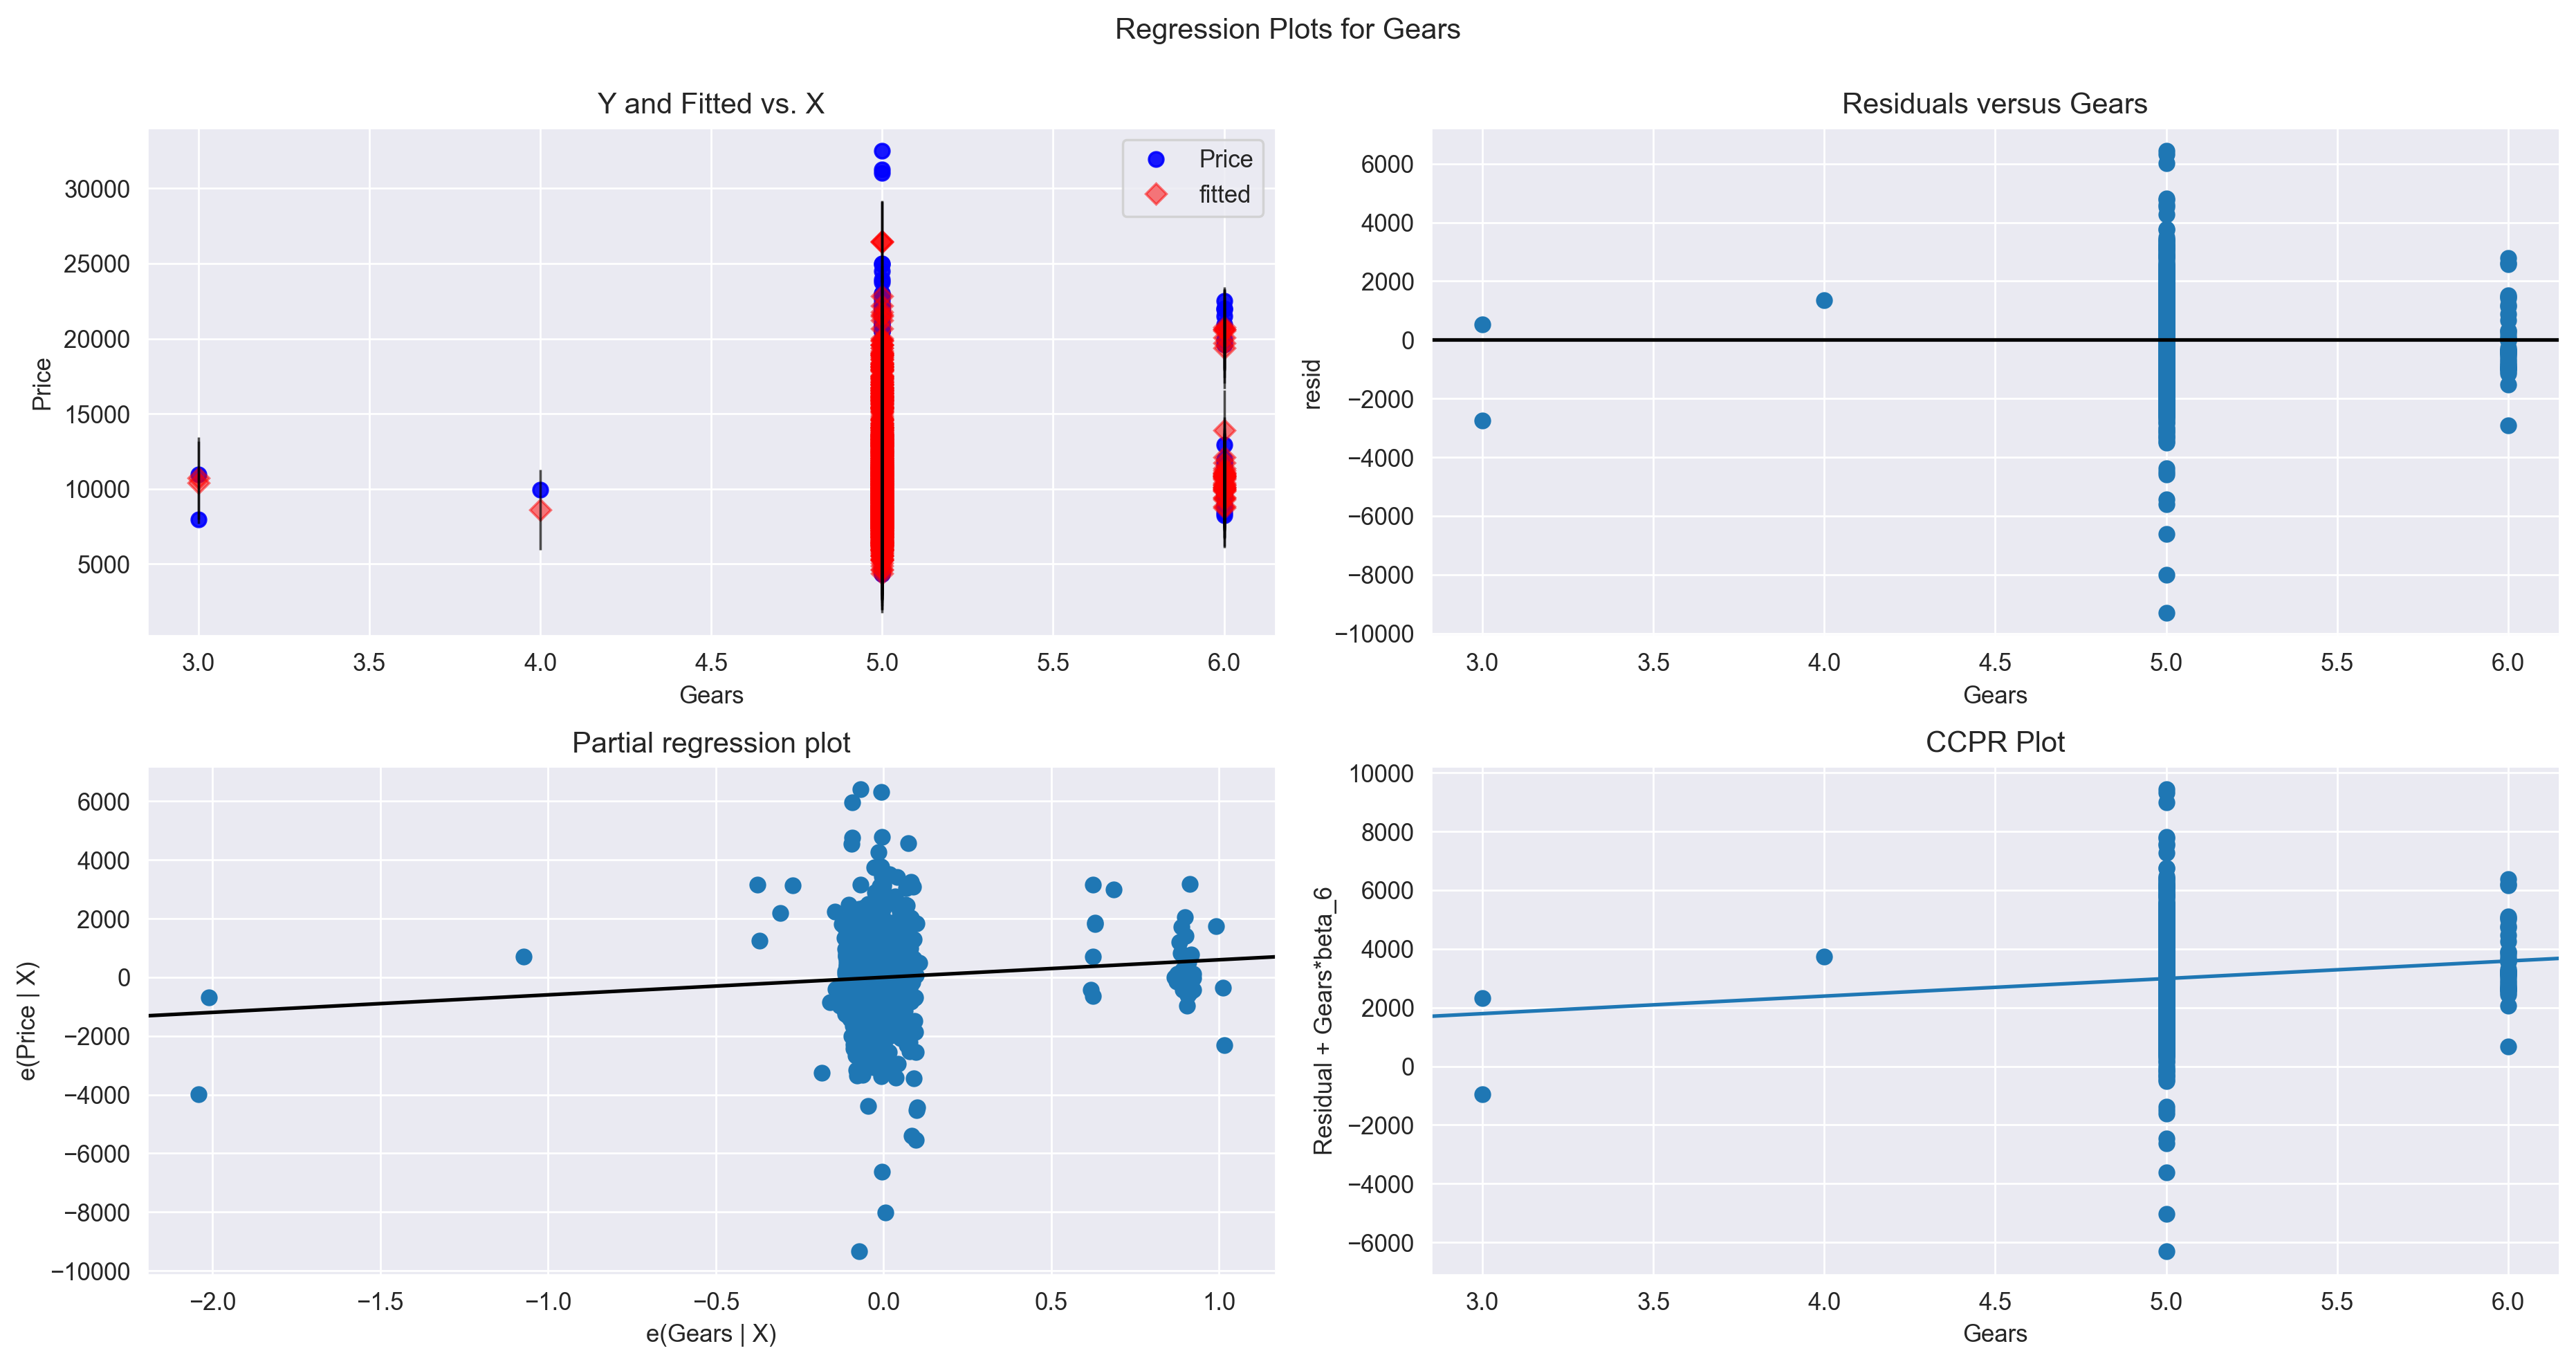

In [55]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, 'Gears', fig = fig)

eval_env: 1


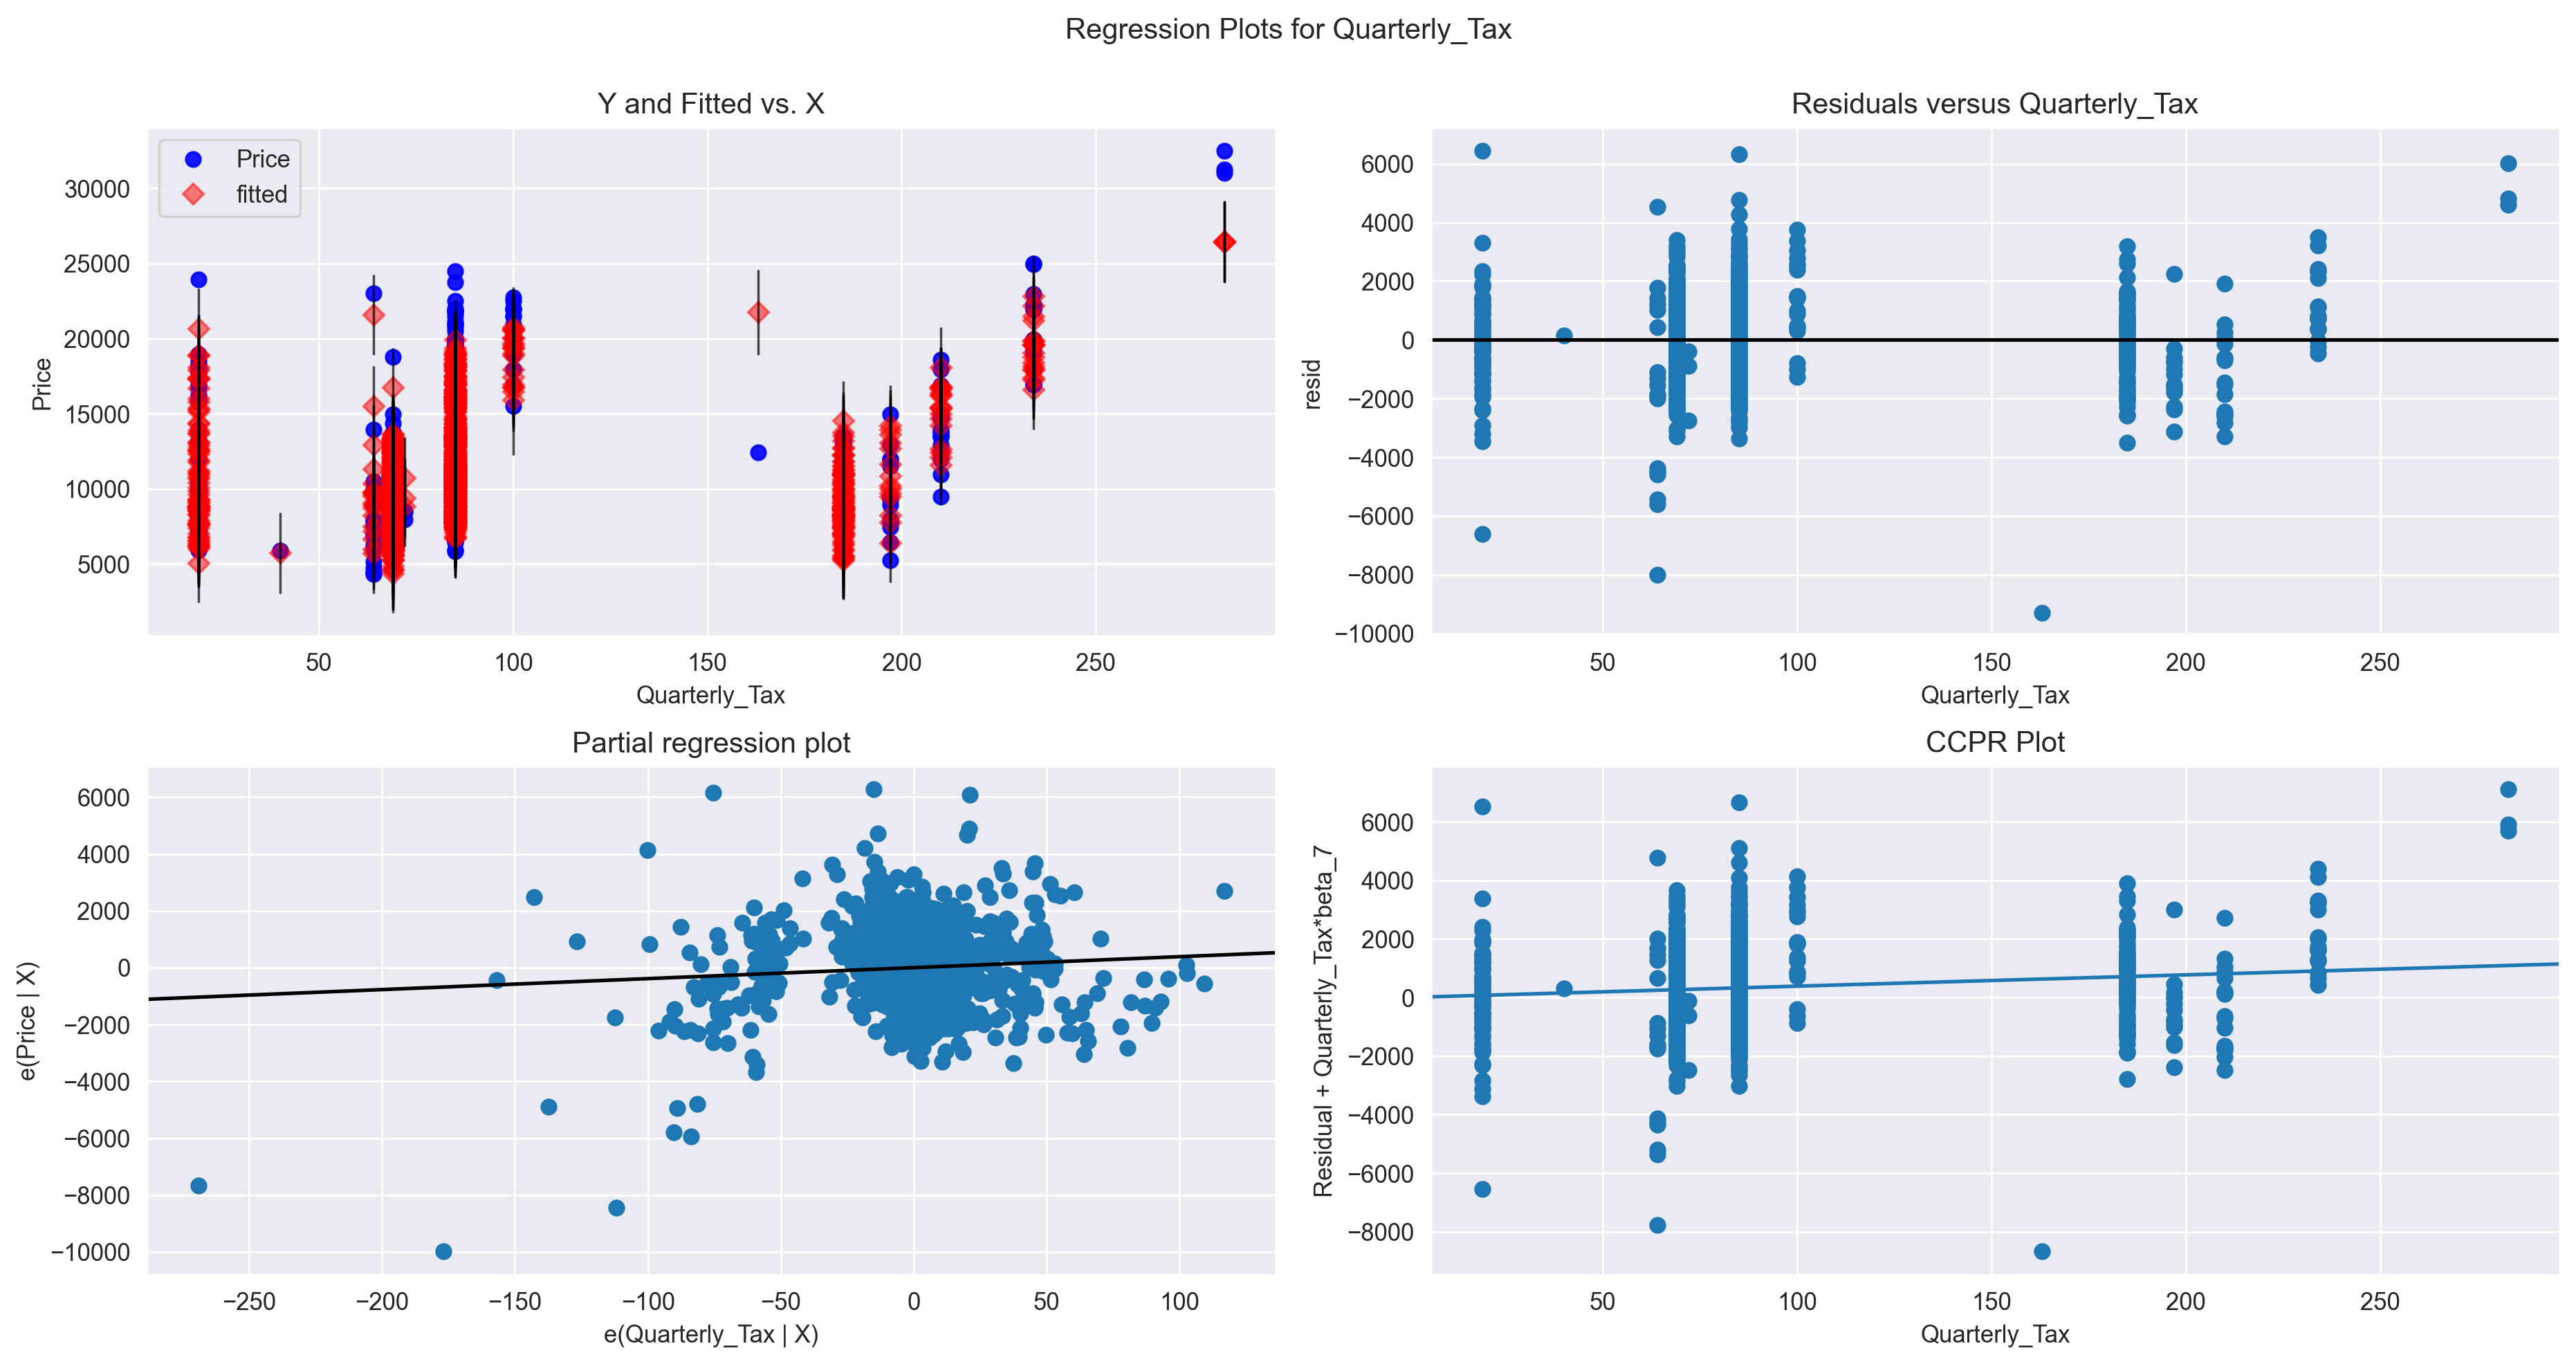

In [56]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, 'Quarterly_Tax', fig = fig)

eval_env: 1


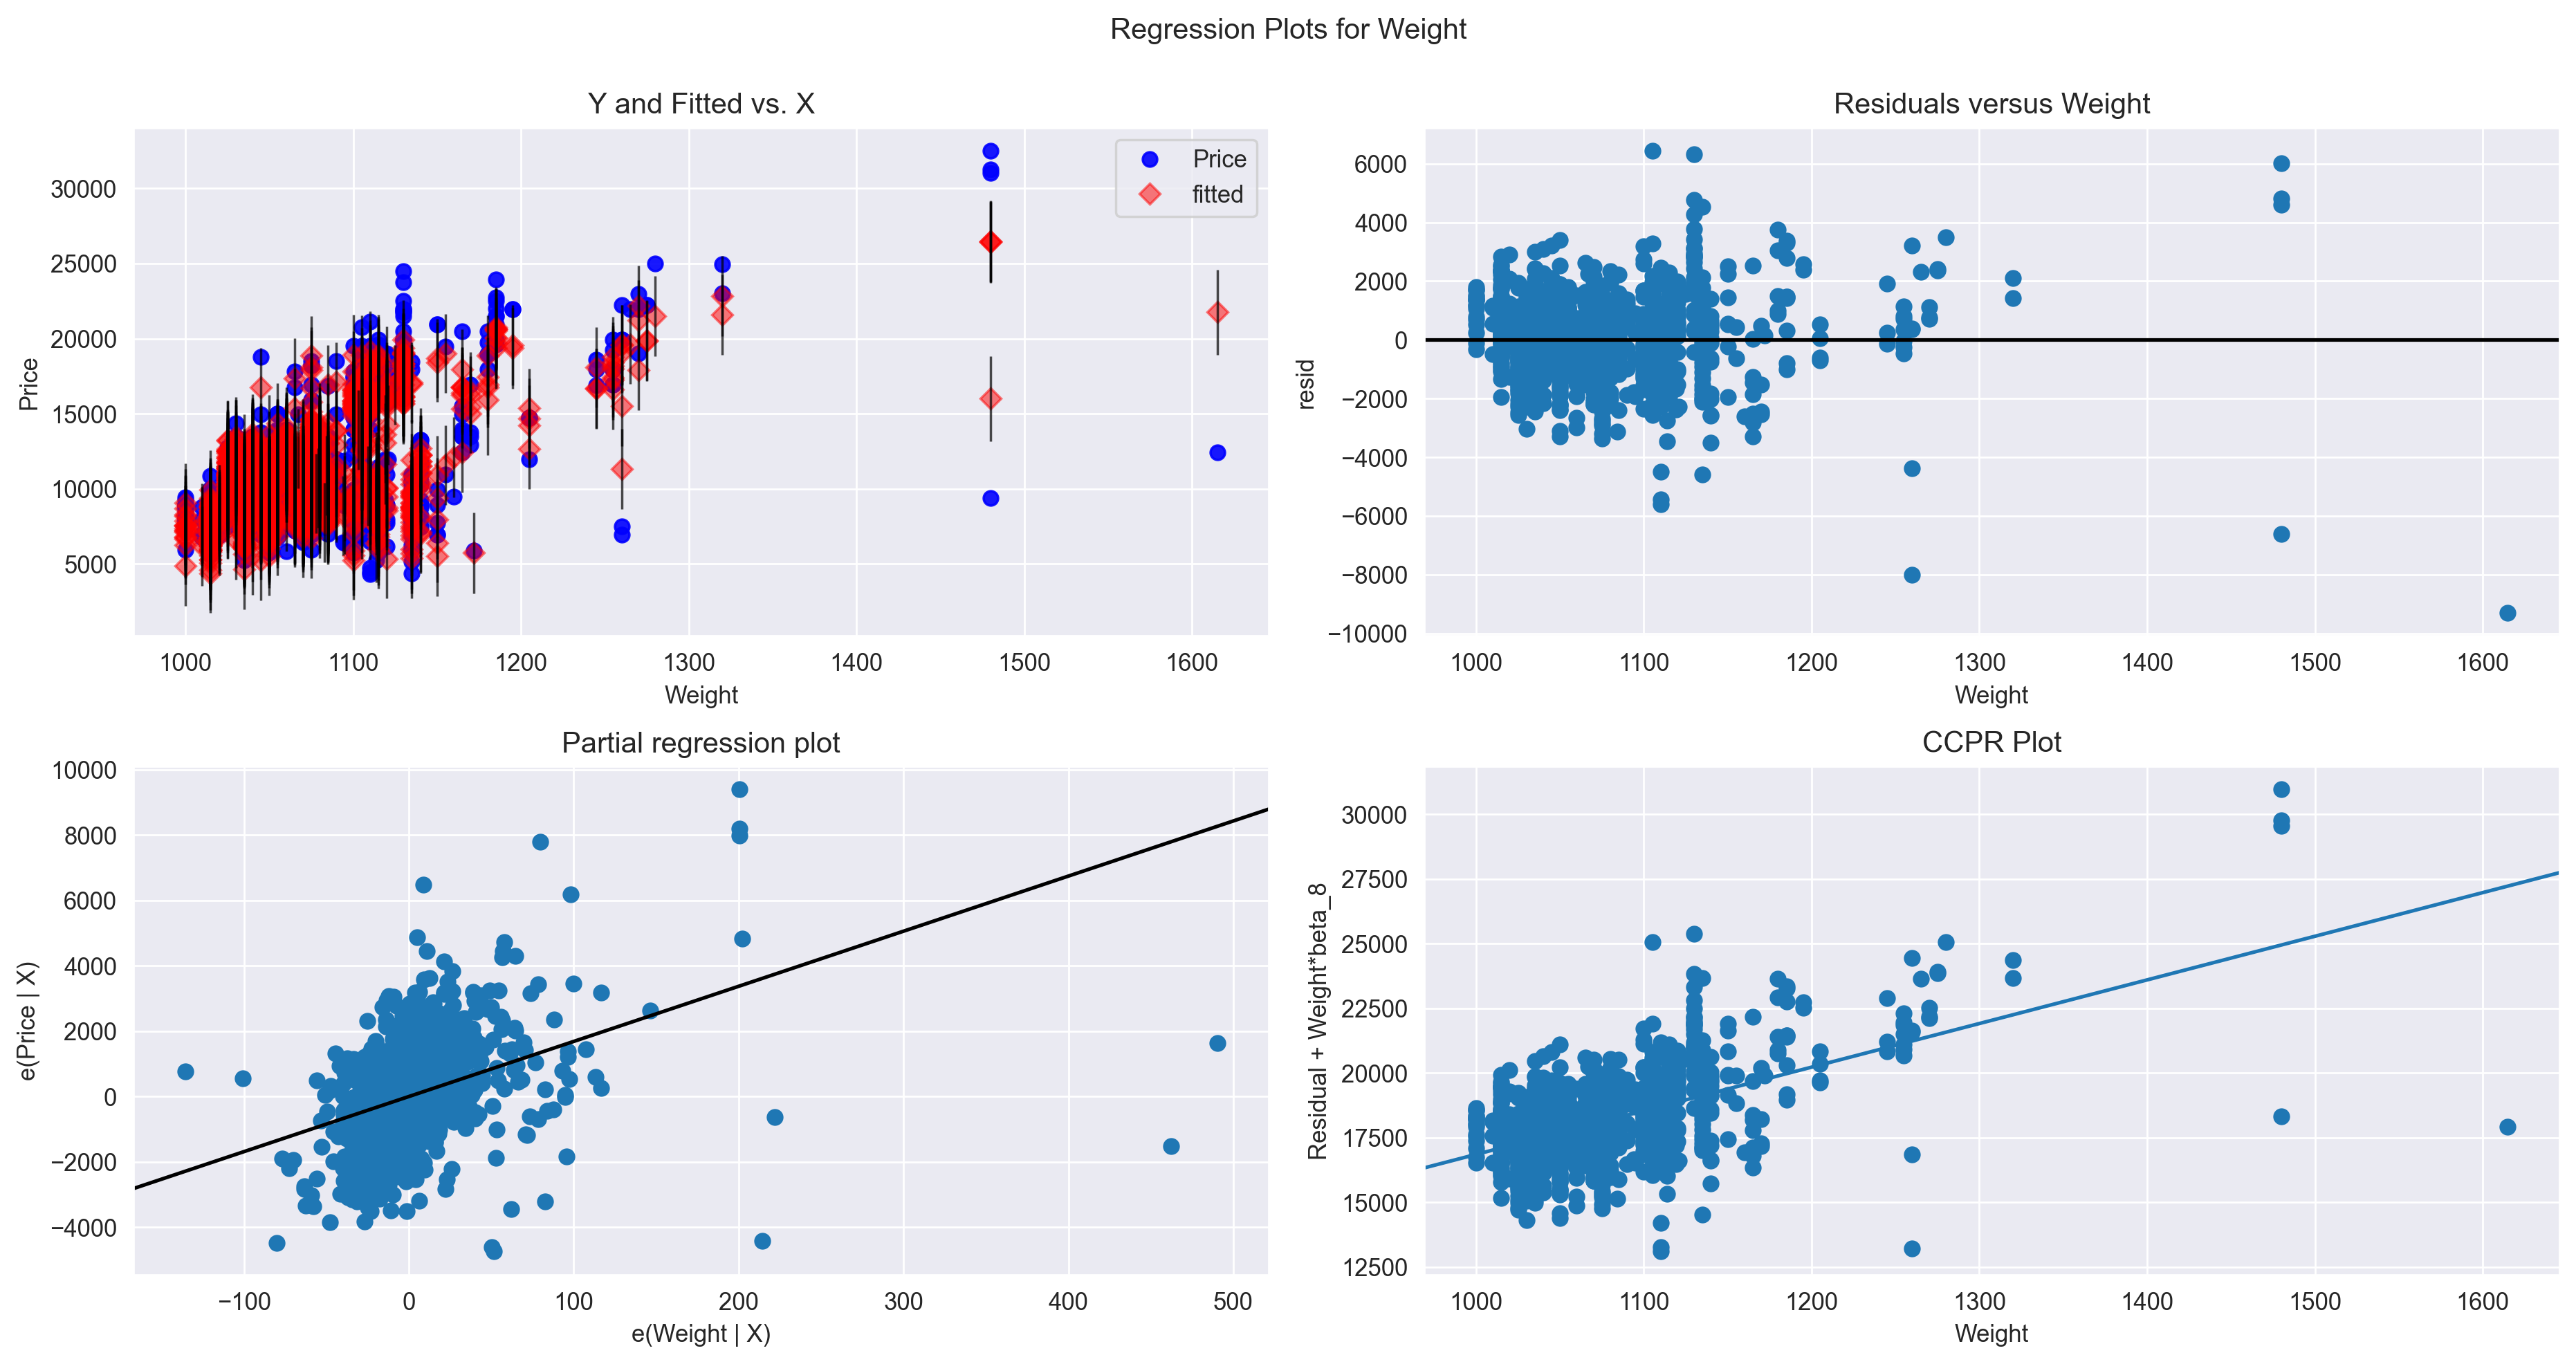

In [57]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, 'Weight', fig = fig)

# Model Deletion Diagnostics (for detecting influencers and outliers)

**1) Cook's Distance**

In [58]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

Text(0, 0.5, "Cook's Distance")

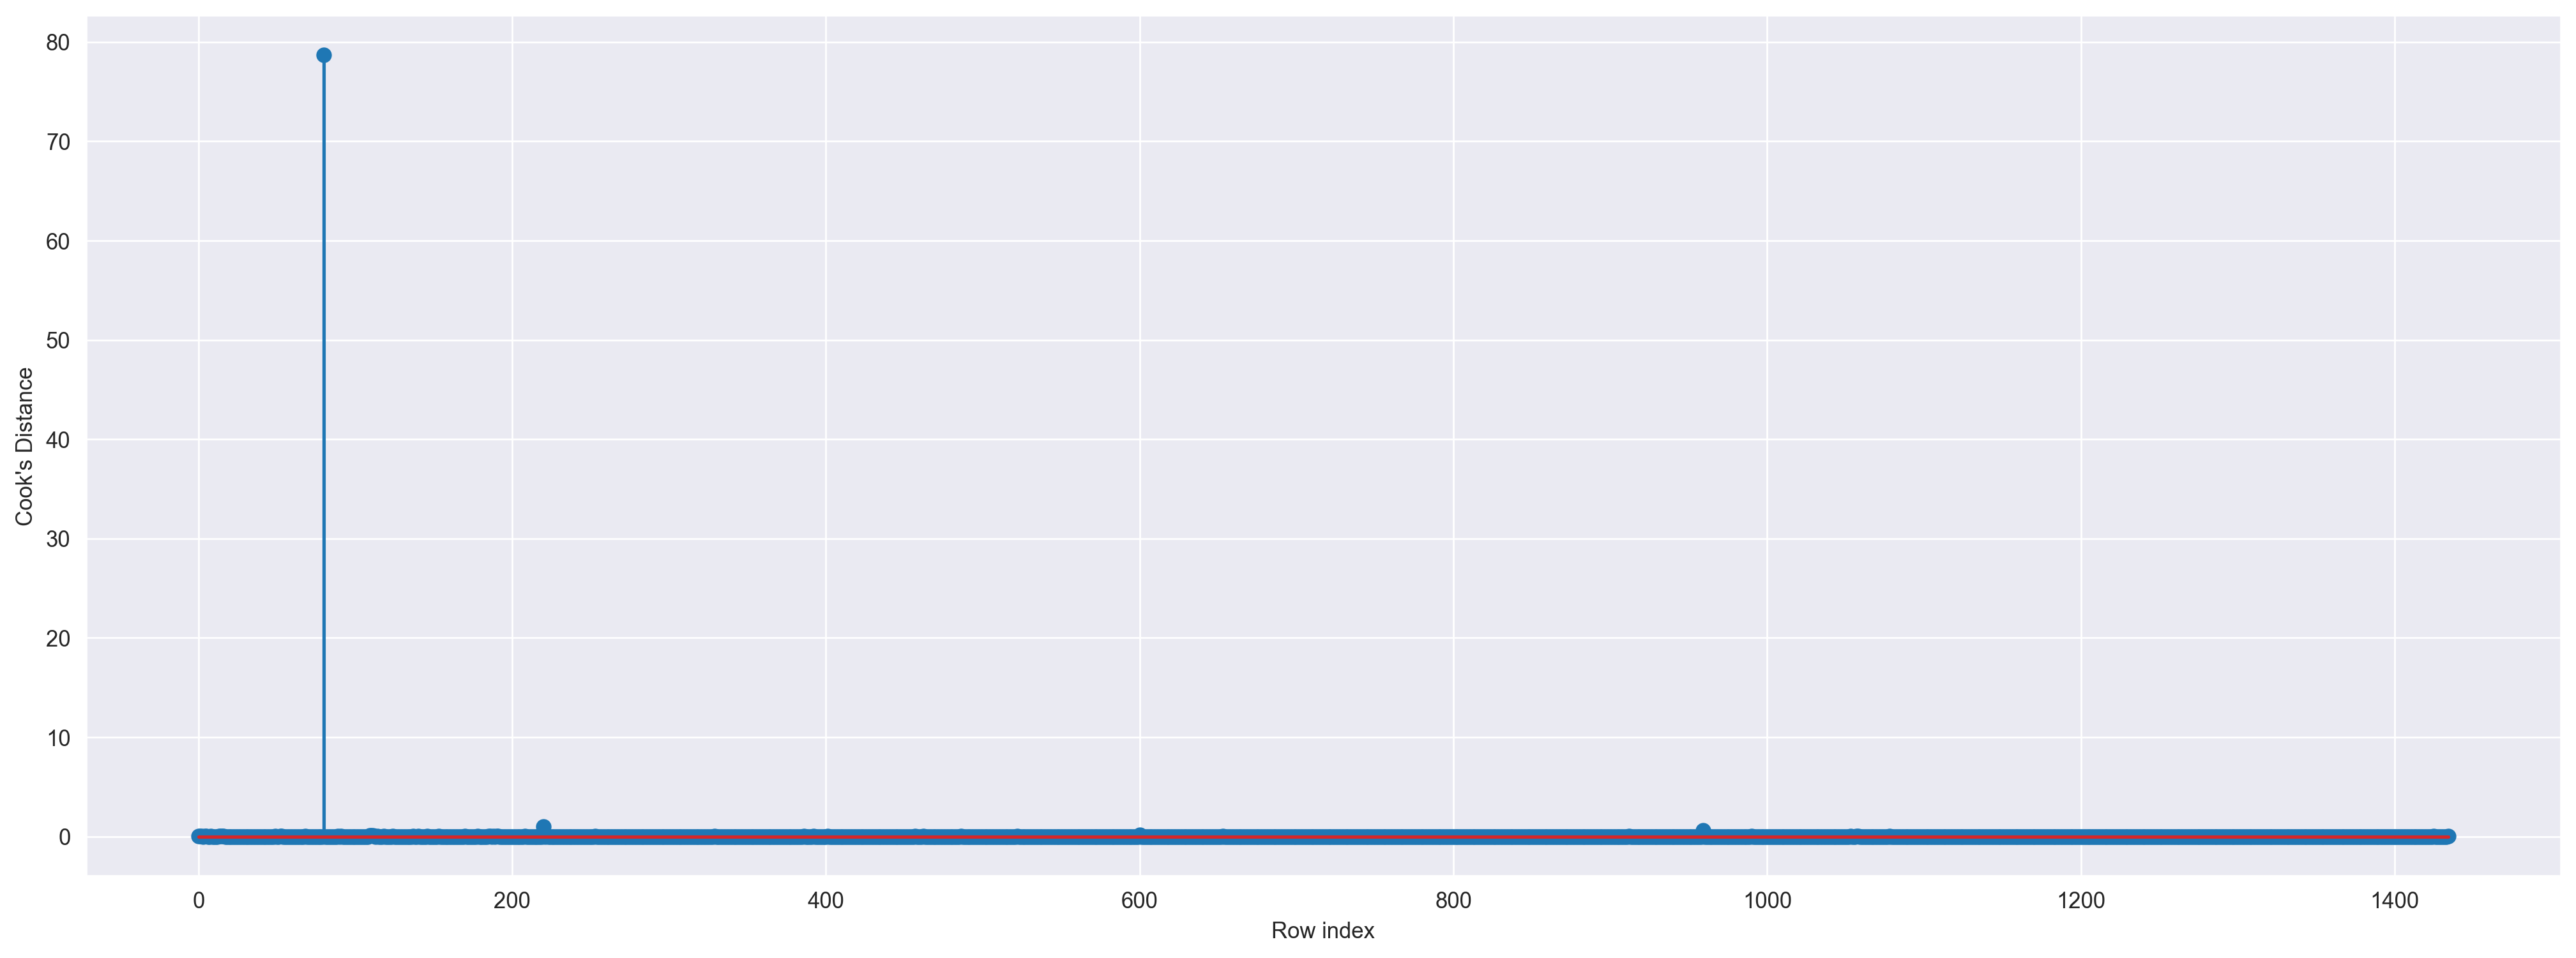

In [59]:
fig = plt.figure(figsize = (20,7))
plt.stem(np.arange(len(df)), np.round(c,3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")

**2) Liverage value using high influence point**

In [60]:
from statsmodels.graphics.regressionplots import influence_plot

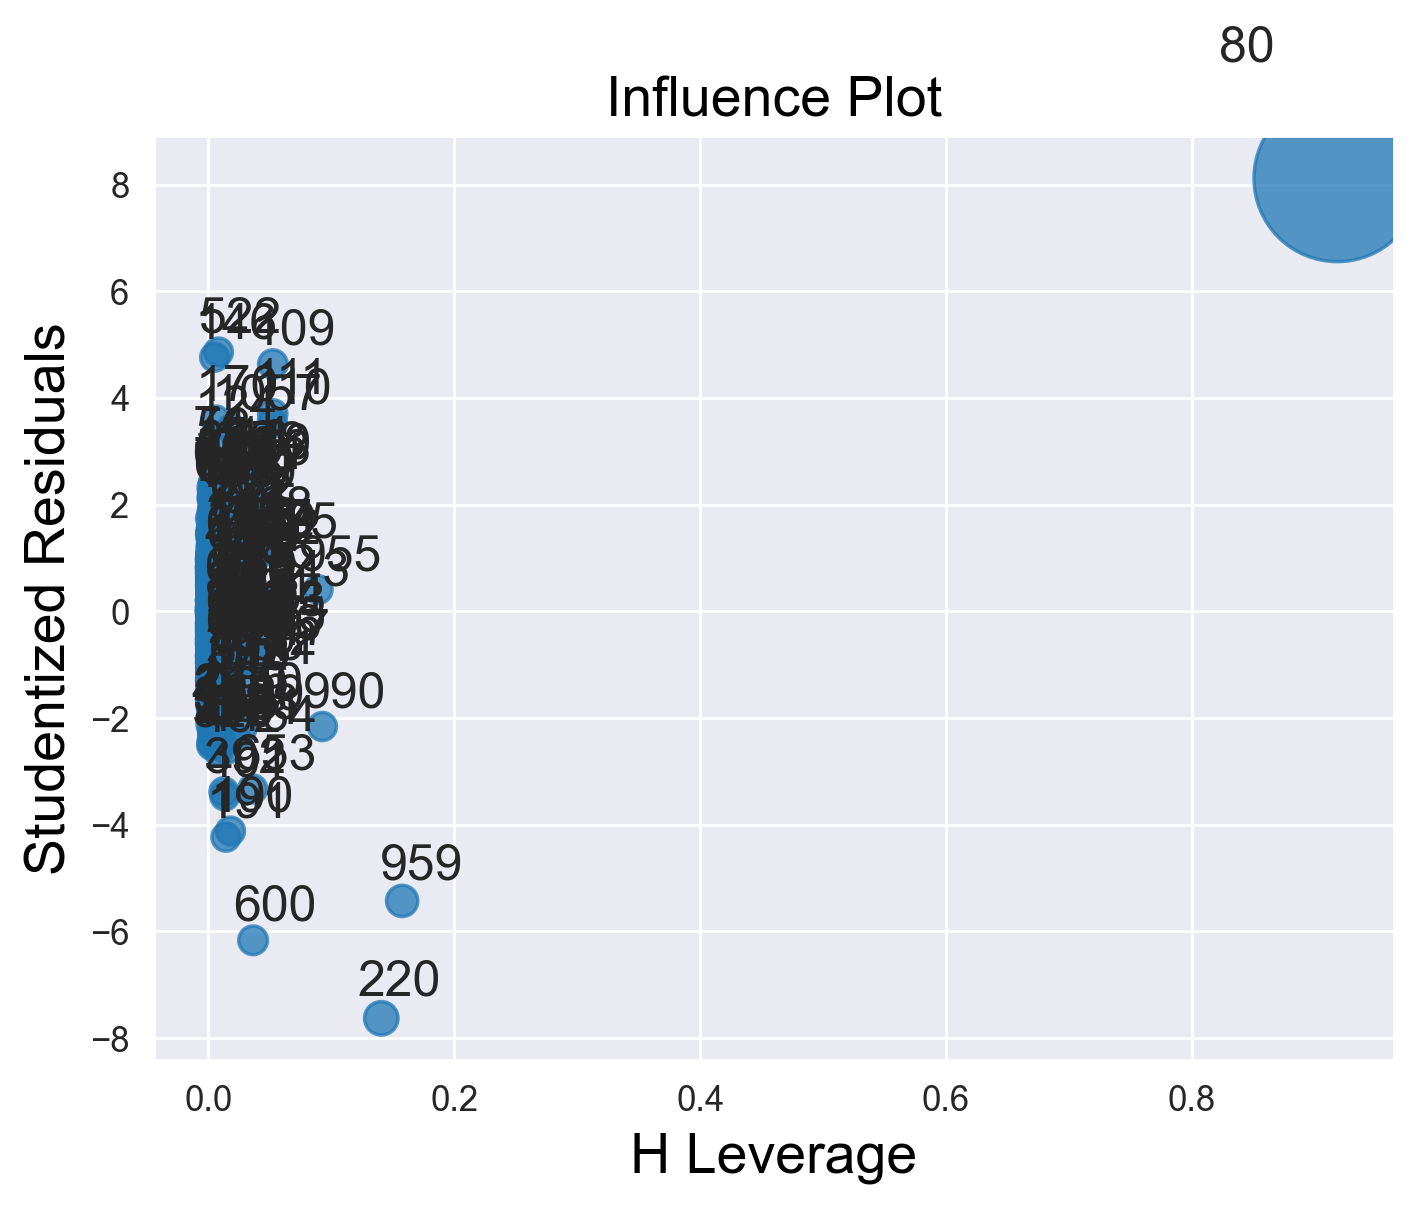

In [62]:
influence_plot(model);

In [64]:
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.020905923344947737

- One data point fall outside the leverage_cutoff value.

In [65]:
# Outlier/Influencer

df[df.index.isin([80])]

Price  Age     KM   HP     CC  Doors  Gears  Quarterly_Tax  Weight
80  18950   25  20019  110  16000      5      5            100    1180

# Improving the model

In [66]:
# Remove outlier/influencer and store it in new variable

Toyota_Data1 = df.drop(df.index[80], axis = 0).reset_index(drop = True)
Toyota_Data1

Price  Age     KM   HP    CC  Doors  Gears  Quarterly_Tax  Weight
0     13500   23  46986   90  2000      3      5            210    1165
1     13750   23  72937   90  2000      3      5            210    1165
2     13950   24  41711   90  2000      3      5            210    1165
3     14950   26  48000   90  2000      3      5            210    1165
4     13750   30  38500   90  2000      3      5            210    1170
...     ...  ...    ...  ...   ...    ...    ...            ...     ...
1429   7500   69  20544   86  1300      3      5             69    1025
1430  10845   72  19000   86  1300      3      5             69    1015
1431   8500   71  17016   86  1300      3      5             69    1015
1432   7250   70  16916   86  1300      3      5             69    1015
1433   6950   76      1  110  1600      5      5             19    1114

[1434 rows x 9 columns]

In [ ]:
# Build the model

In [67]:
while np.max(c)>0.5:
    model_new = smf.ols('Price ~ Age+KM+HP+CC+Doors+Gears+Quarterly_Tax+Weight', data = Toyota_Data1).fit()
    (c,_) = model_new.get_influence().cooks_distance
    c
    np.argmax(c), np.max(c)
    Toyota_Data1 = Toyota_Data1.drop(Toyota_Data1.index[[np.argmax(c)]], axis = 0).reset_index(drop = True)
    Toyota_Data1.head()
else:
    model_final = smf.ols('Price ~ Age+KM+HP+CC+Doors+Gears+Quarterly_Tax+Weight', data = Toyota_Data1).fit()
    print('rsquared = ', model_final.rsquared , '\n', 'AIC = ', model_final.aic)
    print('Final model accuracy improved to = ', round(model_final.rsquared,4))

rsquared =  0.8882395145171204 
 AIC =  24382.707627340686
Final model accuracy improved to =  0.8882


# Model Prediction

**Example**

In [68]:
Prediction = pd.DataFrame({'Age':25, 'KM':50000, 'HP':116, 'CC':1400, 'Doors':5, 'Gears':5, 'Quarterly_Tax':197, 'Weight':1160 }, index=[0])
Prediction['Predicted_Price'] = model_final.predict(Prediction)
Prediction

Age     KM   HP    CC  Doors  Gears  Quarterly_Tax  Weight  Predicted_Price
0   25  50000  116  1400      5      5            197    1160     18674.423194

**Comparison between actual price and predicted price**

In [69]:
Prediction1 = pd.DataFrame()
Prediction1['Actual_Price'] = Toyota_Data1['Price']
Prediction1['Predicted_Price'] = model_final.predict(Toyota_Data1)
Prediction1

Actual_Price  Predicted_Price
0            13500     16345.352610
1            13750     15886.635544
2            13950     16328.224968
3            14950     15996.318854
4            13750     15883.424182
...            ...              ...
1426          7500      9161.230587
1427         10845      8536.091326
1428          8500      8681.531063
1429          7250      8793.668694
1430          6950     10860.695492

[1431 rows x 2 columns]